### Sopravvissuti al naufragio del Titanic

Il 15 aprile 1912, durante il suo viaggio inaugurale, il piroscafo Titanic affondò dopo essere entrato in collisione con un iceberg, causando la morte di 1502 delle 2224 persone a bordo,  tra passeggeri e membri dell’equipaggio. Questa tragedia sconvolse la comunità internazionale e portò a una revisione delle normative sulla sicurezza delle navi.

Una delle ragioni per cui il naufragio causò un numero così elevato di vittime fu la mancanza di scialuppe di salvataggio sufficienti per tutti i passeggeri e i membri dell’equipaggio. Sebbene la sopravvivenza sia dipesa in parte dalla sorte, alcuni gruppi hanno comunque avuto una maggiore probabilità di salvarsi rispetto ad altri, come ad esempio le donne, i bambini e le persone appartenenti alle classi più agiate.

In questa analisi esaminiamo quali tipi di persone hanno avuto maggiore (o minore) probabilità di sopravvivere, con il fine di prevedere, per ciascun passeggero, le sue possibilità di sopravvivere al naufragio.


Il codice selezionato esegue alcune operazioni di configurazione comuni in un ambiente Jupyter Notebook.

1. `from IPython.display import Image`: importa la classe `Image` dal modulo `IPython.display`, che permette di visualizzare immagini direttamente all'interno delle celle del notebook. Questo è utile, ad esempio, per mostrare grafici o immagini di esempio durante l’analisi dei dati.

2. `import warnings`: importa il modulo `warnings`, che serve per gestire e controllare i messaggi di avviso (warning) che Python può generare durante l’esecuzione del codice.

3. `warnings.filterwarnings('ignore')`: utilizza la funzione `filterwarnings` per ignorare tutti i warning che potrebbero essere mostrati. Questo rende l’output del notebook più pulito, soprattutto quando si lavora con librerie che generano molti avvisi non critici.

4. `%matplotlib inline`: è una "magic command" di IPython che indica al notebook di visualizzare i grafici generati da Matplotlib direttamente all’interno delle celle, invece che in una finestra separata. Questo è fondamentale per l’analisi dati interattiva.

In [2]:
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Questo blocco di codice importa tutte le librerie e i moduli necessari per l'analisi dei dati, la visualizzazione, la selezione delle feature e la costruzione di modelli di machine learning.

numpy, pandas: manipolazione di array e DataFrame.
scipy.stats: funzioni statistiche.
seaborn: visualizzazione dati.
sklearn: tutto il necessario per preprocessing, selezione delle feature, suddivisione del dataset, modelli di classificazione, pipeline e metriche di valutazione.
ExtraTreesClassifier, PCA, StandardScaler: tecniche avanzate per selezione delle feature e riduzione della dimensionalità.
GaussianNB, LogisticRegression: modelli di classificazione.
Pipeline: permette di concatenare più passaggi di preprocessing e modellazione.

In [3]:
import numpy as np
import pandas as pd 
import scipy.stats as stats
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.feature_selection import mutual_info_classif, f_classif, SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, roc_curve 
from sklearn.metrics import f1_score, precision_recall_fscore_support, roc_auc_score, make_scorer, auc
from sklearn.linear_model import LogisticRegression

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm

plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd:goldenrod', 'xkcd:cadet blue', 
          'xkcd:scarlet']
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors) 
cmap_big = cm.get_cmap('Spectral', 512)
cmap = mcolors.ListedColormap(cmap_big(np.linspace(0.7, 0.95, 256)))

### Trattamento dei dati
#### Leggiamo i dati in un Dataframe pandas:

In [5]:
df = pd.read_csv("titanic.csv")

Mostriamo un sunto dei dati letti 

In [6]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
print(df.shape)

(891, 12)


In [8]:
print(list(df.columns))

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


Significato delle feature:

*Survival*: Survival(0 = No; 1 = Yes)  
*Pclass*: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)  
*Name*: Name  
*Sex*: Sex (female, male)  
*Age*: Age  
*SibSp*: Number of Siblings/Spouses Aboard  
*Parch*: Number of Parents/Children Aboard  
*Ticket*: Ticket Number  
*Fare*: Passenger Fare  
*Cabin*: Cabin  
*Embarked*: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [9]:
df.rename(columns={'PassengerId': 'id', 'Survived': 'Sopravvissuto', 'Pclass': 'Classe', 'Name': 'Nome', 'Sex':'Sesso', 'Age': 'Età', 'SibSp': 'Fratelli/Sposi', 'Parch': 'Genitori/Figli', 'Ticket': 'Biglietto', 'Fare': 'Tariffa', 'Cabin': 'Cabina', 'Embarked': 'Imbarco'}, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              891 non-null    int64  
 1   Sopravvissuto   891 non-null    int64  
 2   Classe          891 non-null    int64  
 3   Nome            891 non-null    object 
 4   Sesso           891 non-null    object 
 5   Età             714 non-null    float64
 6   Fratelli/Sposi  891 non-null    int64  
 7   Genitori/Figli  891 non-null    int64  
 8   Biglietto       891 non-null    object 
 9   Tariffa         891 non-null    float64
 10  Cabina          204 non-null    object 
 11  Imbarco         889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df.describe()

,id,Sopravvissuto,Classe,Età,Fratelli/Sposi,Genitori/Figli,Tariffa
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Per avere una visione migliore dei dati, andremo a visualizzare le nostre variabili con un *countplot* di Seaborn. Questo grafico mostra il conteggio delle osservazioni in ciascun intervallo categorico usando delle barre. Le variabili categoriche del nostro dataset sono di tipo *integer* e *object*. Dividiamo le variabili in due liste: “categoriche” per le variabili categoriche e “continue” per quelle continue. Le uniche due variabili che possiamo considerare continue sono “age” (età) e “fare” (tariffa).
Per tracciare la distribuzione delle variabili con Seaborn useremo il *distplot*. Dai grafici risulta che non ci sono valori anomali (superiori a 100) per “age”, ma possiamo notare che la variabile “fare” presenta un’ampia scala e la maggior parte dei valori si concentra tra 0 e 100.

In [12]:
discrete =  [ 'Classe', 'Sesso', 'Fratelli/Sposi', 'Genitori/Figli', 'Imbarco', 'Sopravvissuto']

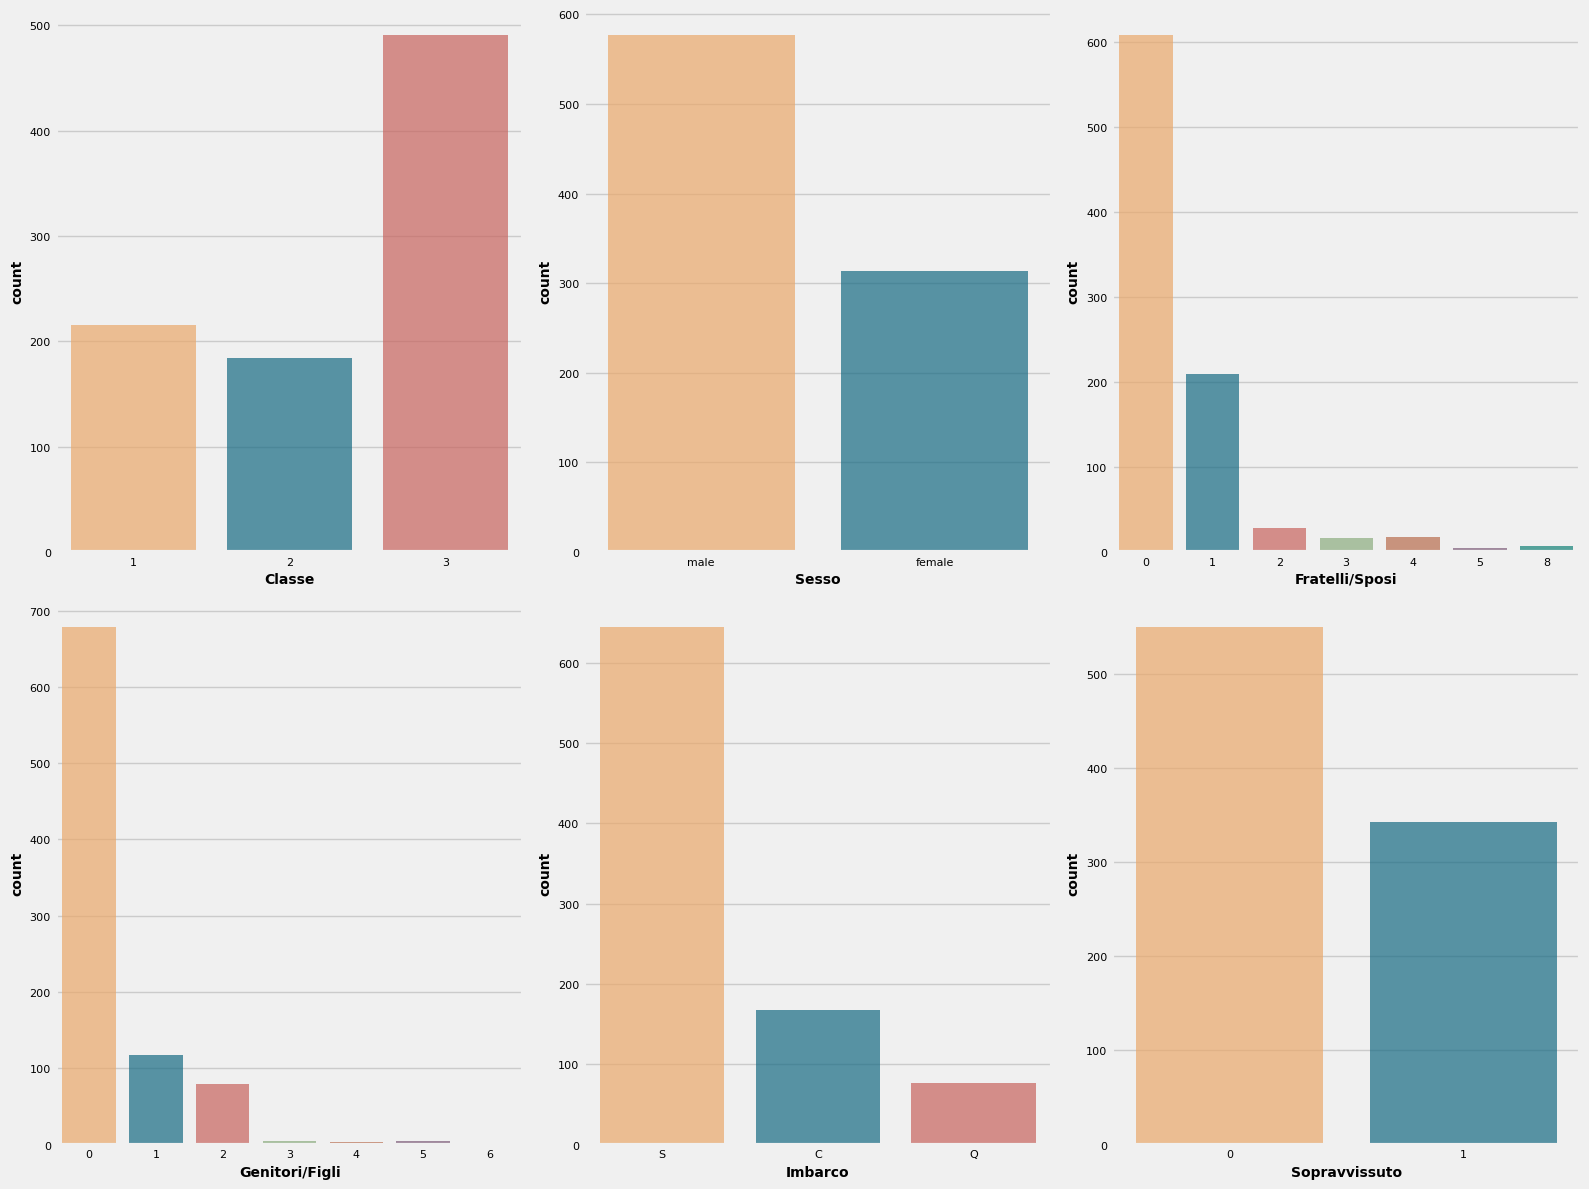

In [13]:
# Crea una griglia di sottoplot 2x3 e imposta la dimensione della figura
fig, axes = plt.subplots(2, 3, figsize=(16, 12))
axes = axes.flatten()  # Appiattisce l'array di assi per un accesso più semplice

# Per ogni variabile categorica nella lista 'discrete', crea un countplot su un asse diverso
for i, item in enumerate(discrete):
    sns.countplot(x=item, data=df, alpha=.7, ax=axes[i])

plt.tight_layout()  # Ottimizza la disposizione dei sottoplot
plt.show()          # Mostra la figura

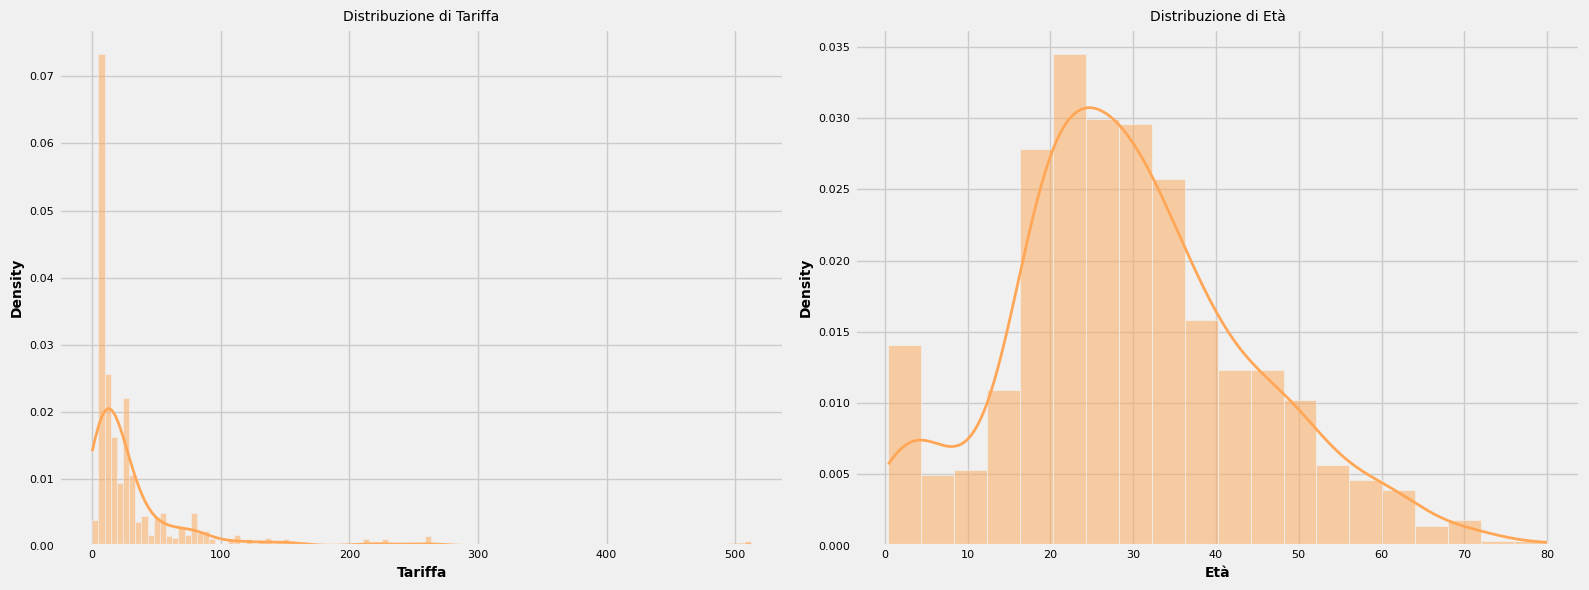

In [14]:
contin = ['Tariffa', 'Età']

# Creazione della figura e degli assi tramite l'interfaccia a oggetti di matplotlib
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Ciclo sulle variabili continue per tracciare la distribuzione
for i, col in enumerate(contin):
    # Disegna l'istogramma con curva di densità su ciascun asse
    sns.histplot(df[col].dropna(), kde=True, stat="density", line_kws={'lw':2,'color':colors[5]}, ax=axes[i])
    axes[i].set_title(f'Distribuzione di {col}')  # Titolo per ogni sottografico

plt.tight_layout()  # Ottimizza la disposizione dei sottoplot
plt.show()

Introduciamo una nuova feature binaria, che ci dice se la persona viaggiava sola

In [16]:
# Aggiunge una nuova colonna binaria 'Solo' al DataFrame.
# La colonna vale 1 se il passeggero viaggiava da solo (nessun fratello/sposo né genitore/figlio a bordo), altrimenti 0.
df['Solo'] = np.where((df["Fratelli/Sposi"] + df["Genitori/Figli"]) > 0, 0, 1)

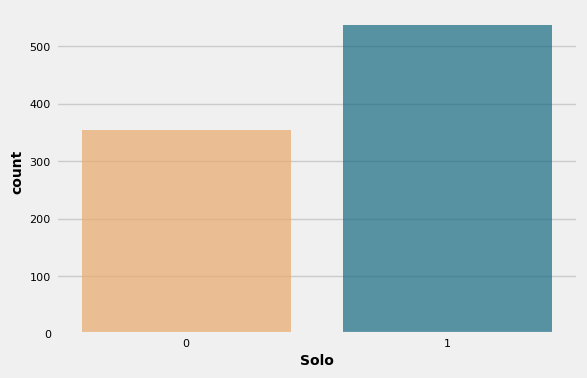

In [17]:
# Creiamo una figura e un asse usando l'interfaccia a oggetti di matplotlib
fig, ax = plt.subplots(figsize=(6, 4))

# Disegniamo un countplot della variabile 'Solo' (1=viaggiava solo, 0=accompagnato)
sns.countplot(x='Solo', data=df, alpha=.7, ax=ax)

# Mostriamo il grafico
plt.show()


Osserviamo ora la distribuzione dei sopravvissuti per diverse tipologie di passeggeri

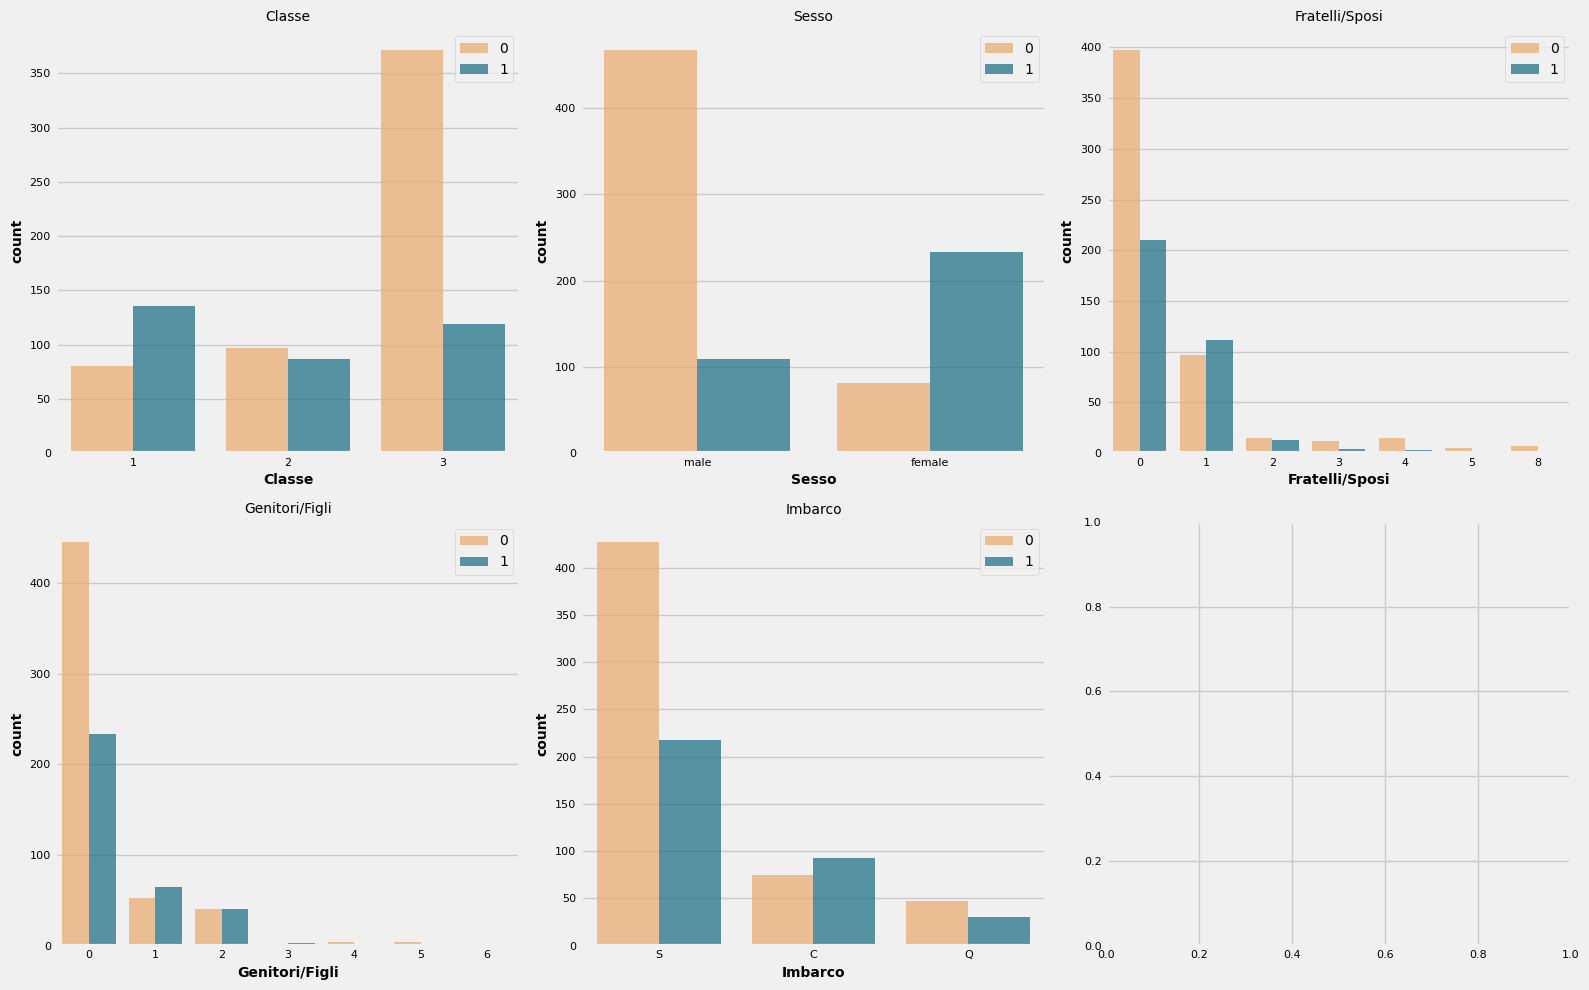

In [18]:
# Creiamo una griglia di sottoplot 2x3 usando l'interfaccia a oggetti di matplotlib
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()  # Appiattiamo l'array di assi per un accesso più semplice

plot_idx = 0
# Per ogni variabile categorica in 'discrete' (tranne 'Sopravvissuto'), creiamo un countplot
for col in discrete:
    if col != 'Sopravvissuto':
        # Disegniamo il countplot della variabile, suddiviso per sopravvivenza (hue)
        sns.countplot(x=col, data=df, hue='Sopravvissuto', alpha=.7, ax=axes[plot_idx])
        axes[plot_idx].legend(loc=1)  # Posizioniamo la legenda
        axes[plot_idx].set_title(col) # Titolo del sottografico
        plot_idx += 1

plt.tight_layout()  # Ottimizza la disposizione dei sottoplot
plt.show()          # Mostra la figura

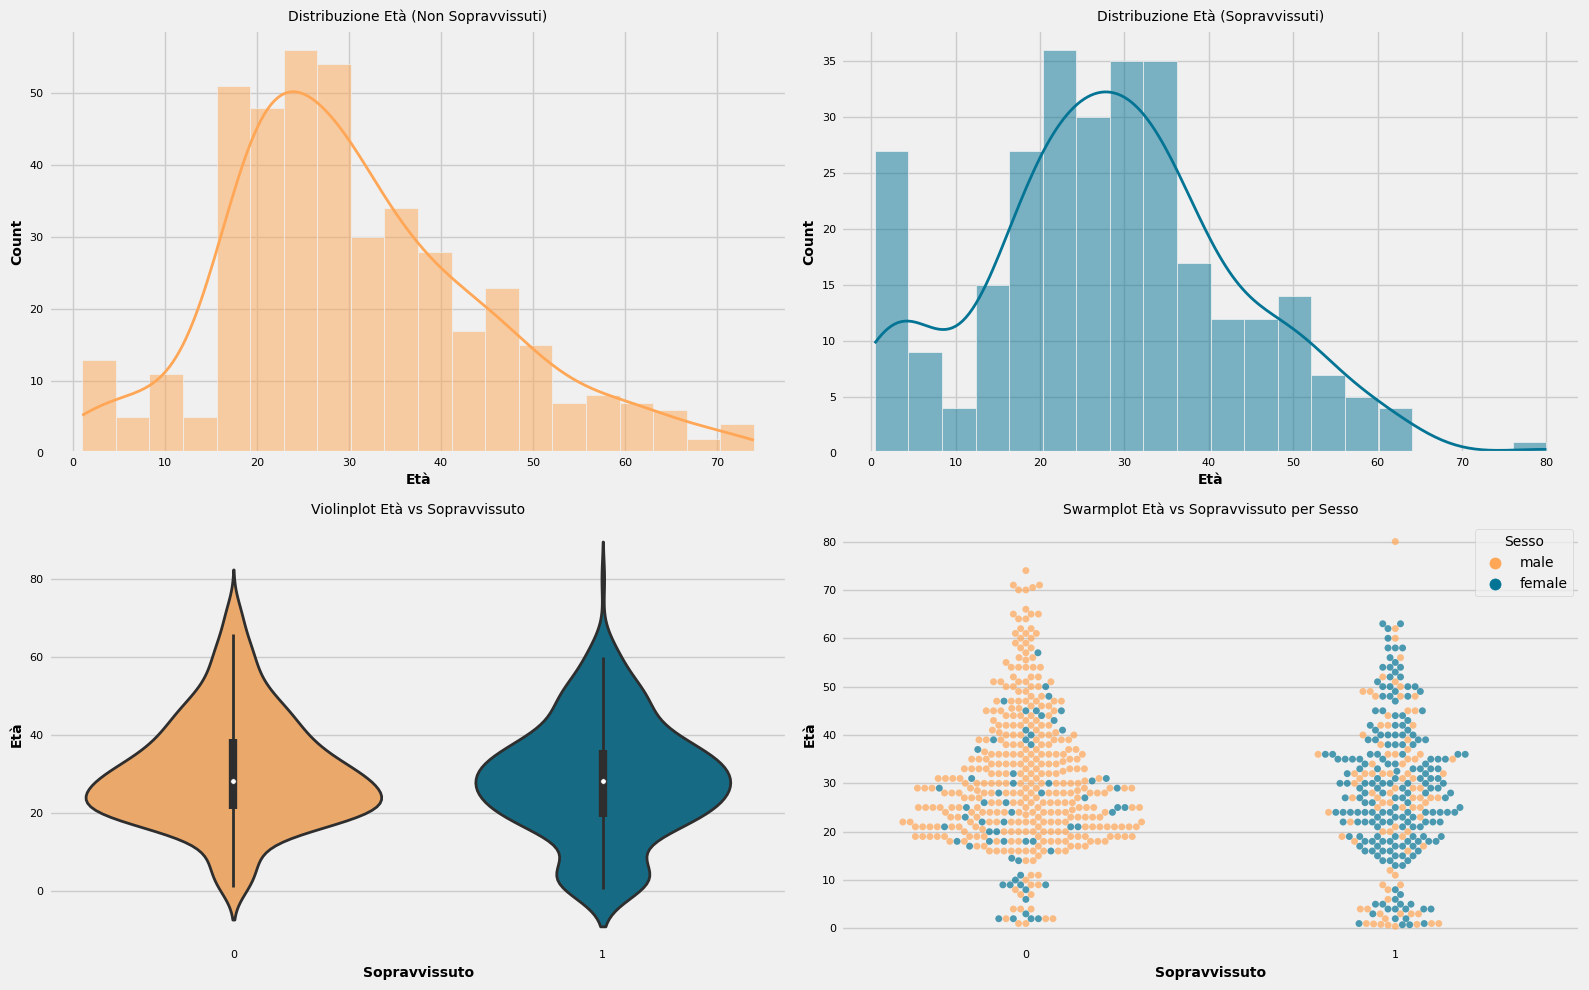

In [19]:
# Crea una griglia di 2x2 sottoplot e imposta la dimensione della figura
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Istogramma dell'età per i passeggeri non sopravvissuti
sns.histplot(
    df[df.Sopravvissuto==0]['Età'].dropna(), 
    kde=True, bins=20, 
    line_kws={"lw": 2}, 
    label='0', 
    ax=axes[0, 0]
)
axes[0, 0].set_title('Distribuzione Età (Non Sopravvissuti)')

# Istogramma dell'età per i passeggeri sopravvissuti
sns.histplot(
    df[df.Sopravvissuto==1]['Età'].dropna(), 
    color=colors[1], kde=True, bins=20, 
    line_kws={"lw": 2}, 
    label='1', 
    ax=axes[0, 1]
)
axes[0, 1].set_title('Distribuzione Età (Sopravvissuti)')

# Violinplot dell'età in funzione della sopravvivenza
sns.violinplot(
    x="Sopravvissuto", y="Età", 
    data=df, alpha=.7, ax=axes[1, 0]
)
axes[1, 0].set_title('Violinplot Età vs Sopravvissuto')

# Swarmplot dell'età in funzione della sopravvivenza, suddiviso per sesso
sns.swarmplot(
    x="Sopravvissuto", y="Età", 
    hue="Sesso", alpha=.7, data=df, ax=axes[1, 1]
)
axes[1, 1].set_title('Swarmplot Età vs Sopravvissuto per Sesso')

# Ottimizza la disposizione dei sottoplot e mostra la figura
plt.tight_layout()
plt.show()

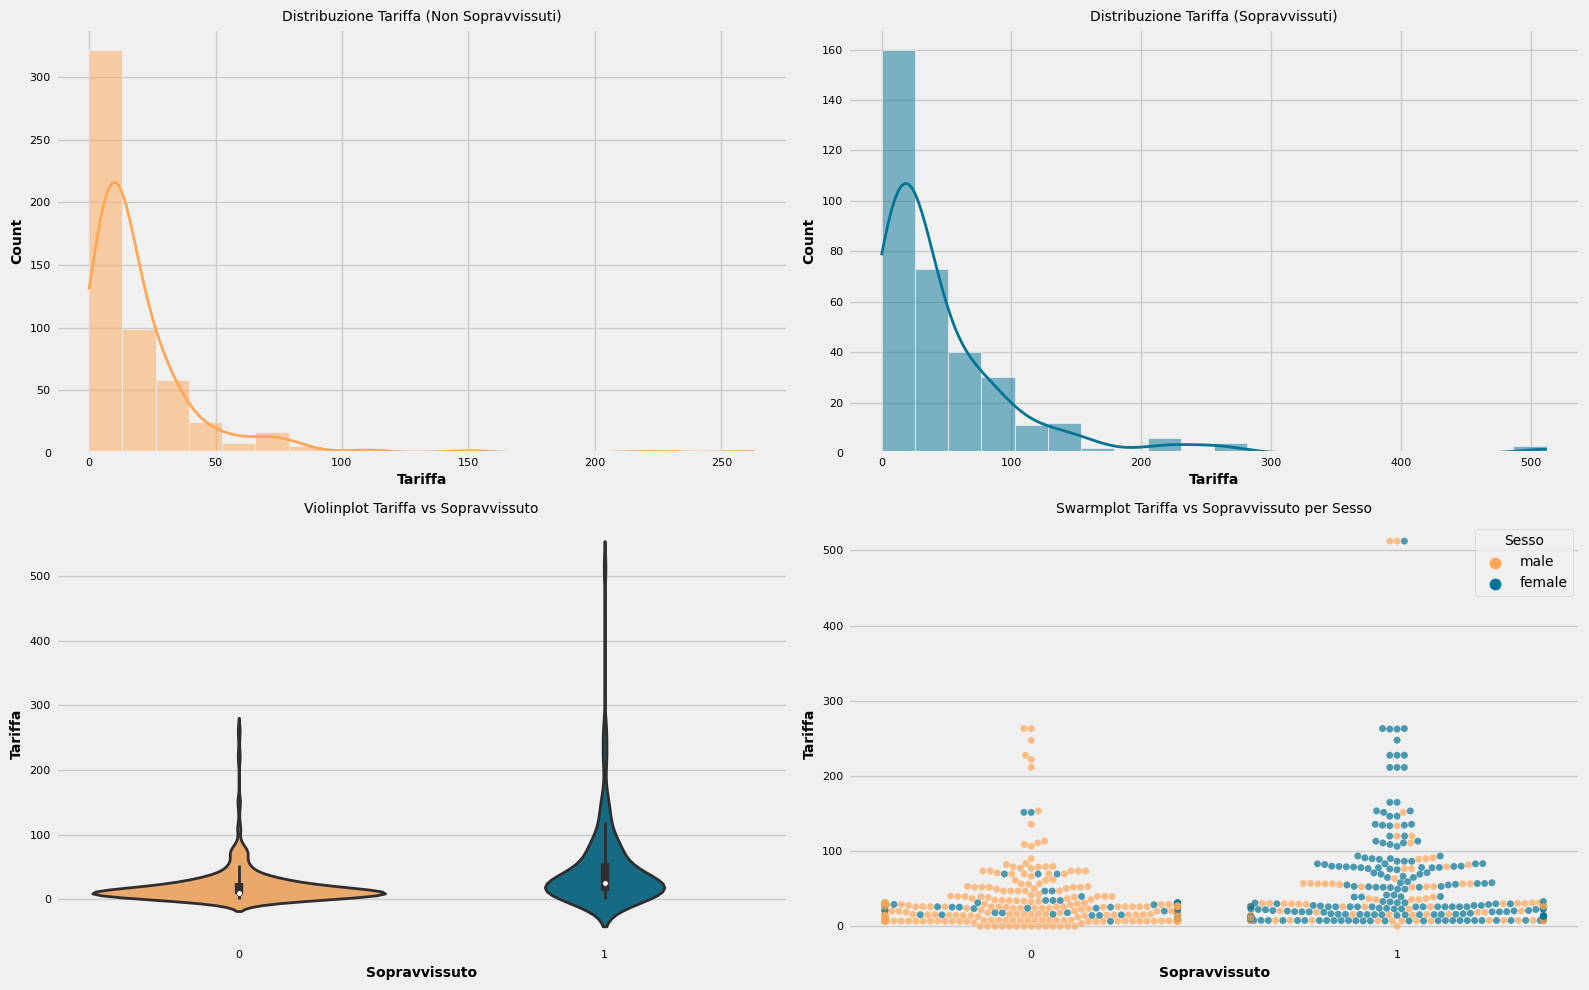

In [20]:
# Creiamo una griglia di 2x2 sottoplot usando l'interfaccia a oggetti di matplotlib
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Istogramma della tariffa per i passeggeri non sopravvissuti
sns.histplot(
    df[df.Sopravvissuto==0]['Tariffa'].dropna(),  # Seleziona le tariffe dei non sopravvissuti
    kde=True, bins=20,                            # Aggiunge la curva di densità, 20 bin
    line_kws={"lw": 2},                           # Spessore linea della curva di densità
    label='0',
    ax=axes[0, 0]                                 # Disegna sul primo subplot
)
axes[0, 0].set_title('Distribuzione Tariffa (Non Sopravvissuti)')

# Istogramma della tariffa per i passeggeri sopravvissuti
sns.histplot(
    df[df.Sopravvissuto==1]['Tariffa'].dropna(),  # Seleziona le tariffe dei sopravvissuti
    color=colors[1], kde=True, bins=20,           # Colore diverso, curva di densità, 20 bin
    line_kws={"lw": 2},
    label='1',
    ax=axes[0, 1]                                 # Disegna sul secondo subplot
)
axes[0, 1].set_title('Distribuzione Tariffa (Sopravvissuti)')

# Violinplot della tariffa in funzione della sopravvivenza
sns.violinplot(
    x="Sopravvissuto", y="Tariffa",
    data=df, alpha=.7, ax=axes[1, 0]              # Visualizza la distribuzione della tariffa per sopravvivenza
)
axes[1, 0].set_title('Violinplot Tariffa vs Sopravvissuto')

# Swarmplot della tariffa in funzione della sopravvivenza, suddiviso per sesso
sns.swarmplot(
    x="Sopravvissuto", y="Tariffa",
    hue="Sesso", alpha=.7, data=df, ax=axes[1, 1] # Visualizza ogni punto, separando per sesso
)
axes[1, 1].set_title('Swarmplot Tariffa vs Sopravvissuto per Sesso')

plt.tight_layout()  # Ottimizza la disposizione dei sottoplot
plt.show()          # Mostra la figura

### Valutiamo alcune probabilità condizionate di sopravvivenza

In [21]:
def cond_prob(feature):
    # Ottiene i valori unici non nulli della feature selezionata
    values = df[feature].dropna().unique()
    results = []
    for val in values:
        # Conta il numero di sopravvissuti (Sopravvissuto==1) per ciascun valore della feature
        survived = df[(df[feature] == val) & (df['Sopravvissuto'] == 1)].shape[0]
        # Conta il numero totale di passeggeri per ciascun valore della feature
        total = df[df[feature] == val].shape[0]
        # Calcola la probabilità condizionata di sopravvivenza dato il valore della feature
        prob = survived / total if total > 0 else np.nan
        # Aggiunge il valore e la probabilità alla lista dei risultati
        results.append([val, prob])
    # Restituisce un DataFrame con i risultati
    return pd.DataFrame(results, columns=['value', 'prob'])

In [22]:
def cond_prob_2(feature1, feature2):
    # Filtra il DataFrame per valori non nulli delle due feature
    filtered_df = df[df[feature1].notnull() & df[feature2].notnull()]
    # Ottieni i valori unici delle due feature
    values1 = filtered_df[feature1].unique()
    values2 = filtered_df[feature2].unique()
    results = []
    # Cicla su tutte le combinazioni di valori delle due feature
    for val1 in values1:
        for val2 in values2:
            # Seleziona il sottoinsieme di dati con i valori specifici per entrambe le feature
            subset = filtered_df[(filtered_df[feature1] == val1) & (filtered_df[feature2] == val2)]
            total = len(subset)  # Numero totale di passeggeri per questa combinazione
            survived = subset['Sopravvissuto'].sum()  # Numero di sopravvissuti per questa combinazione
            # Calcola la probabilità condizionata di sopravvivenza per la combinazione
            prob = survived / total if total > 0 else np.nan
            # Aggiungi i risultati alla lista
            results.append([val1, val2, prob])
    # Restituisci un DataFrame con i risultati
    return pd.DataFrame(results, columns=[feature1, feature2, 'prob'])

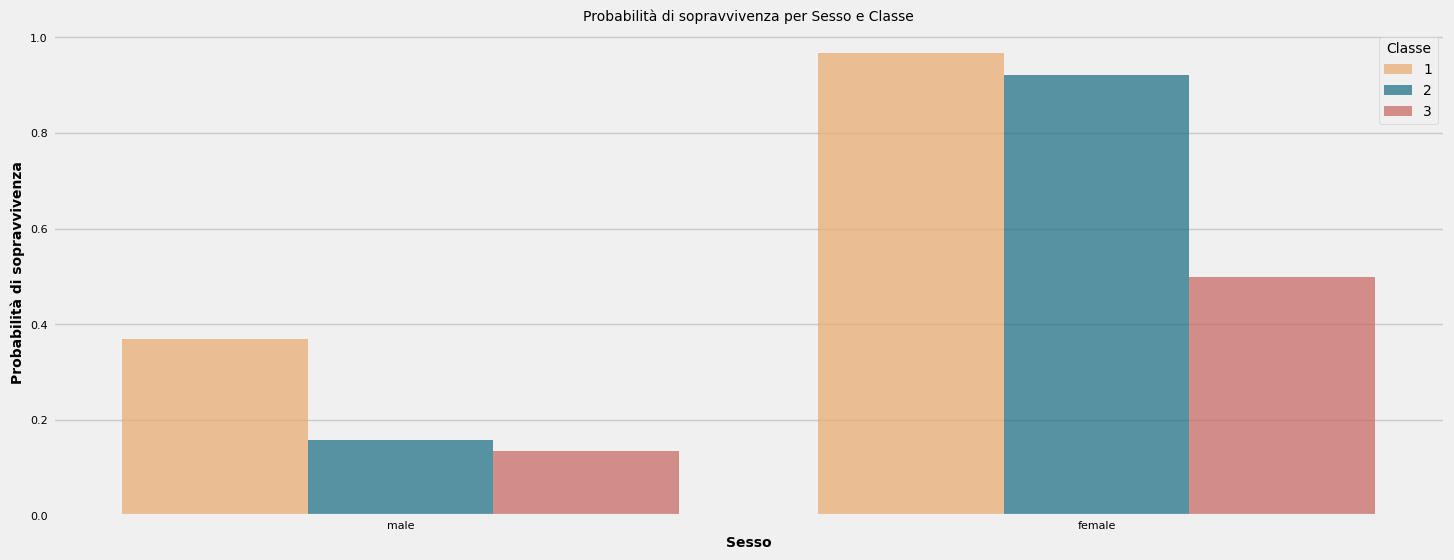

In [23]:
cp = cond_prob_2('Sesso', 'Classe')
fig, ax = plt.subplots(figsize=(16, 6))
# Visualizza la probabilità condizionata di sopravvivenza per sesso e classe
sns.barplot(x='Sesso', y='prob', hue='Classe', data=cp, alpha=.7, ax=ax)
ax.set_title('Probabilità di sopravvivenza per Sesso e Classe')
ax.set_ylabel('Probabilità di sopravvivenza')
ax.set_xlabel('Sesso')
plt.show()

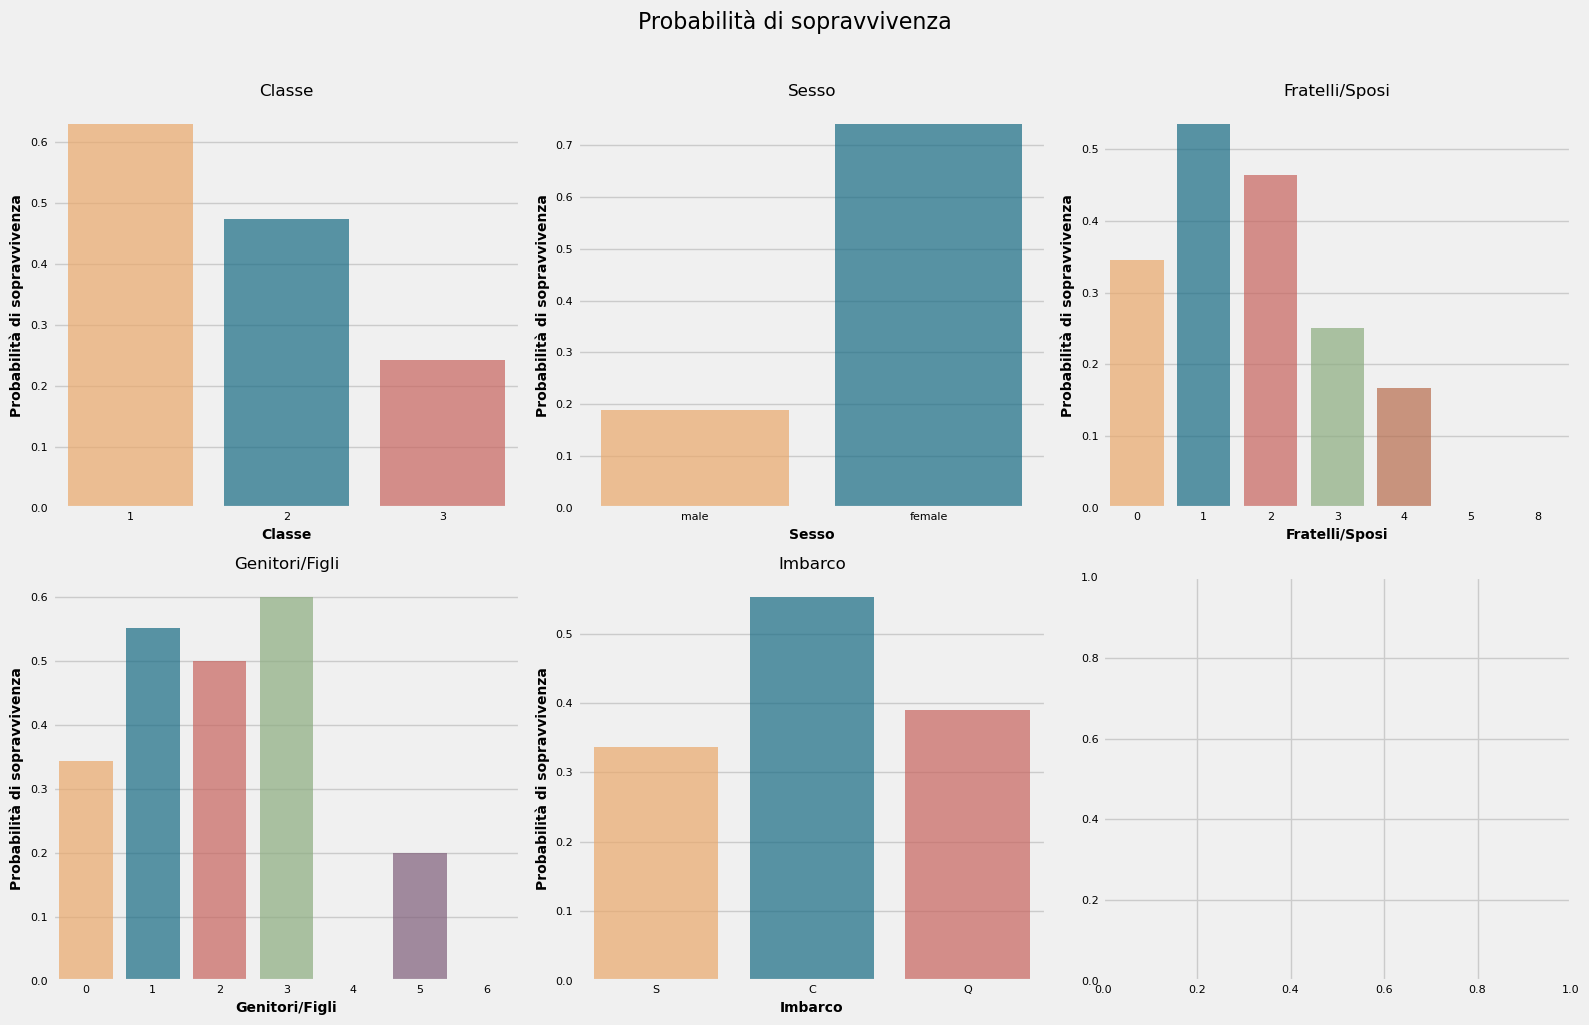

In [29]:
# Visualizza la probabilità di sopravvivenza per ciascuna variabile categorica (escluso 'Sopravvissuto')
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()
plot_idx = 0
for col in discrete:
    if col != 'Sopravvissuto':
        data = cond_prob(col)
        # Crea un barplot della probabilità di sopravvivenza per ciascun valore della variabile
        sns.barplot(x='value', y='prob', data=data, alpha=.7, ax=axes[plot_idx])
        axes[plot_idx].set_title(col, fontsize=12)
        axes[plot_idx].set_xlabel(col)
        axes[plot_idx].set_ylabel('Probabilità di sopravvivenza')
        plot_idx += 1
fig.suptitle('Probabilità di sopravvivenza', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

In [30]:
# Definiamo i bin per l'età (da 0 a 90 anni, intervalli di 10)
bins = range(0, 90, 10)

# Calcoliamo la frequenza dei sopravvissuti per ciascun intervallo di età
frq00, edges = np.histogram(df.loc[df.Sopravvissuto == 1, 'Età'], bins=bins)

# Calcoliamo la frequenza totale dei passeggeri per ciascun intervallo di età
frq01, _     = np.histogram(df['Età'], bins=bins)

# Calcoliamo la frequenza dei passeggeri di sesso maschile per ciascun intervallo di età
frq0, _      = np.histogram(df.loc[df.Sesso == 'male', 'Età'], bins=bins)

# Calcoliamo la frequenza dei sopravvissuti di sesso maschile per ciascun intervallo di età
frq1, _      = np.histogram(df.loc[(df.Sopravvissuto == 1) & (df.Sesso == 'male'), 'Età'], bins=bins)

# Calcoliamo la frequenza dei passeggeri di sesso femminile per ciascun intervallo di età
frq2, _      = np.histogram(df.loc[df.Sesso == 'female', 'Età'], bins=bins)

# Calcoliamo la frequenza dei sopravvissuti di sesso femminile per ciascun intervallo di età
frq3, _      = np.histogram(df.loc[(df.Sopravvissuto == 1) & (df.Sesso == 'female'), 'Età'], bins=bins)

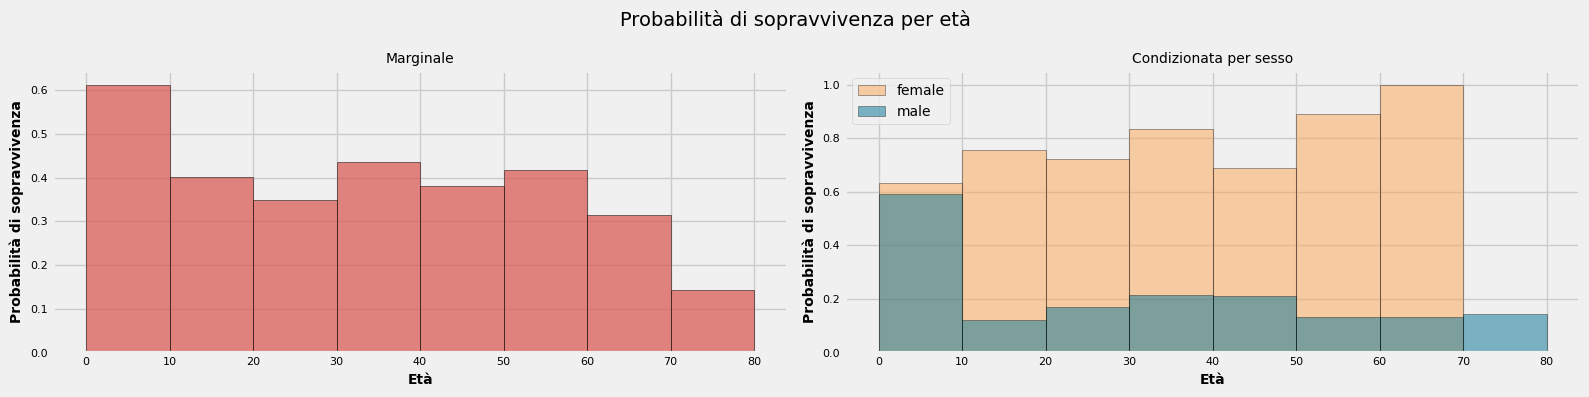

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# Probabilità marginale di sopravvivenza per intervallo di età
axes[0].bar(edges[:-1], frq00 / frq01, width=np.diff(edges), ec="k", align="edge", color=colors[2], alpha=.7)
axes[0].set_title('Marginale')
axes[0].set_xlabel('Età')
axes[0].set_ylabel('Probabilità di sopravvivenza')

# Probabilità condizionata di sopravvivenza per intervallo di età e sesso
axes[1].bar(edges[:-1], frq3 / frq2, width=np.diff(edges), ec="k", align="edge", color=colors[0], alpha=.5, label='female')
axes[1].bar(edges[:-1], frq1 / frq0, width=np.diff(edges), ec="k", align="edge", color=colors[1], alpha=.5, label='male')
axes[1].set_title('Condizionata per sesso')
axes[1].set_xlabel('Età')
axes[1].set_ylabel('Probabilità di sopravvivenza')
axes[1].legend()

fig.suptitle('Probabilità di sopravvivenza per età', fontsize=14)
plt.tight_layout()
plt.show()

In [33]:
# Calcola le frequenze delle tariffe per diversi gruppi di passeggeri e sopravvivenza
# bins: intervalli di tariffa (da 0 a 600, passo 50)
# frq00: sopravvissuti in ciascun intervallo di tariffa
# frq01: totale passeggeri in ciascun intervallo di tariffa
# frq0: uomini in ciascun intervallo di tariffa
# frq1: uomini sopravvissuti in ciascun intervallo di tariffa
# frq2: donne in ciascun intervallo di tariffa
# frq3: donne sopravvissute in ciascun intervallo di tariffa
bins = range(0, 600, 50)
frq00, edges = np.histogram(df[df.Sopravvissuto == 1]['Tariffa'], bins=bins)
frq01, _     = np.histogram(df['Tariffa'], bins=bins)
frq0, _      = np.histogram(df[df.Sesso == 'male']['Tariffa'], bins=bins)
frq1, _      = np.histogram(df[(df.Sopravvissuto == 1) & (df.Sesso == 'male')]['Tariffa'], bins=bins)
frq2, _      = np.histogram(df[df.Sesso == 'female']['Tariffa'], bins=bins)
frq3, _      = np.histogram(df[(df.Sopravvissuto == 1) & (df.Sesso == 'female')]['Tariffa'], bins=bins)

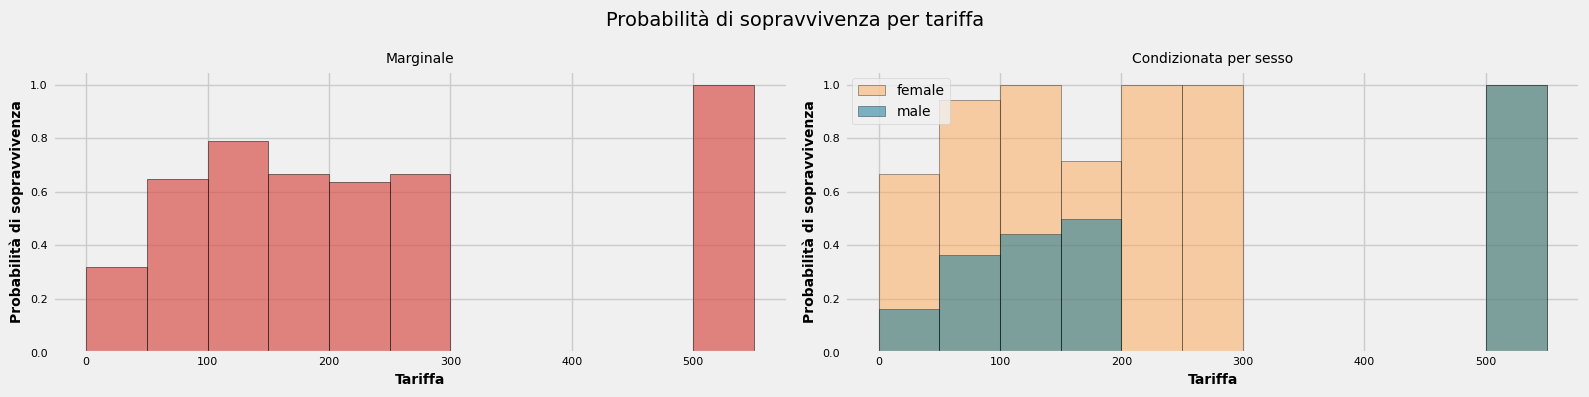

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# Primo subplot: probabilità marginale di sopravvivenza per tariffa
axes[0].bar(edges[:-1], frq00 / frq01, width=np.diff(edges), ec="k", align="edge", color=colors[2], alpha=.7)
axes[0].set_title('Marginale')
axes[0].set_xlabel('Tariffa')
axes[0].set_ylabel('Probabilità di sopravvivenza')

# Secondo subplot: probabilità condizionata per sesso
axes[1].bar(edges[:-1], frq3 / frq2, width=np.diff(edges), ec="k", align="edge", color=colors[0], alpha=.5, label='female')
axes[1].bar(edges[:-1], frq1 / frq0, width=np.diff(edges), ec="k", align="edge", color=colors[1], alpha=.5, label='male')
axes[1].set_title('Condizionata per sesso')
axes[1].set_xlabel('Tariffa')
axes[1].set_ylabel('Probabilità di sopravvivenza')
axes[1].legend()

fig.suptitle('Probabilità di sopravvivenza per tariffa', fontsize=14)
# Ottimizza la disposizione dei sottoplot per evitare sovrapposizioni tra etichette e titoli
fig.tight_layout()
plt.show()

In [585]:
df.columns

Index(['id', 'Sopravvissuto', 'Classe', 'Nome', 'Sesso', 'Età',
       'Fratelli/Sposi', 'Genitori/Figli', 'Biglietto', 'Tariffa', 'Cabina',
       'Imbarco', 'Solo'],
      dtype='object')

## Modifiche delle feature

Prima di tutto, esaminiamo le features che presentano valori mancanti

In [37]:
# Trova le colonne che contengono almeno un valore mancante nel DataFrame
missing_values = df.columns[df.isna().any()].tolist()

# Stampa la lista delle colonne con valori mancanti
print("Colonne con valori mancanti:", missing_values)

Colonne con valori mancanti: ['Età', 'Cabina', 'Imbarco']


Consideriamole una ad una

In [39]:
# Calcola e stampa il numero e la frazione di valori mancanti per la colonna 'Età'
num_missing_eta = df['Età'].isnull().sum()
frac_missing_eta = num_missing_eta / df.shape[0]

print(f"Numero di valori mancanti per Età: {num_missing_eta}")
print(f"Frazione di valori mancanti per Età: {frac_missing_eta:5.3f}")

Numero di valori mancanti per Età: 177
Frazione di valori mancanti per Età: 0.199


*Età* ha pochi valori mancanti. Possiamo gestire la situazione inserendo un valore opportuno dove il valore è mancante. Per decidere quale valore esaminiamo la distribuzione dei valori di *Età*

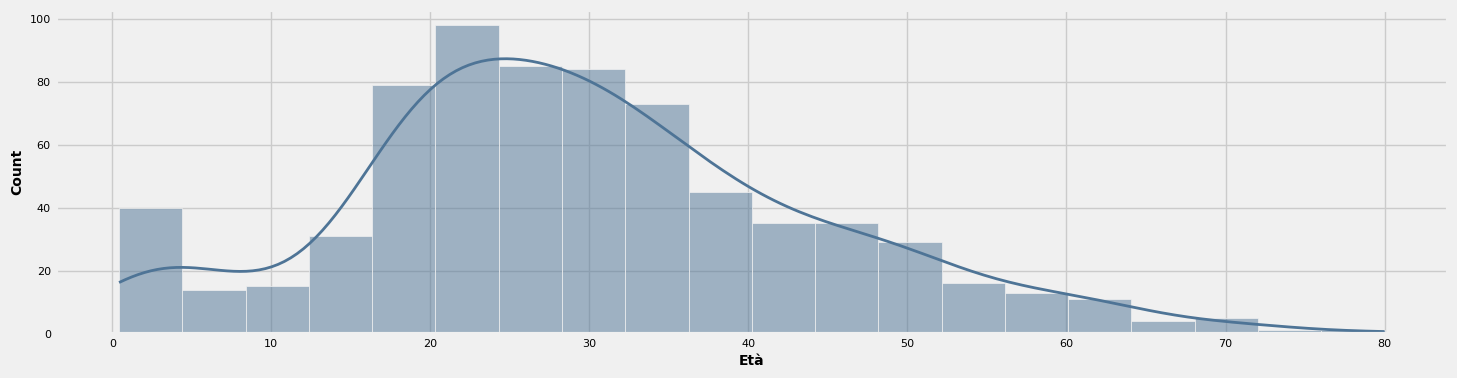

In [40]:
# Crea la figura e l'asse usando l'interfaccia a oggetti di matplotlib
fig, ax = plt.subplots(figsize=(16, 4))

# Istogramma della distribuzione dell'età con curva di densità
sns.histplot(
    df[df['Età'].notnull()]['Età'],  # Usa solo i valori non nulli di Età
    kde=True,                        # Aggiunge la curva di densità
    bins=20,                         # Numero di bin dell'istogramma
    color=colors[8],                 # Colore dal ciclo colori personalizzato
    ax=ax                            # Disegna sull'asse creato
)

# Imposta le etichette degli assi
ax.set_xlabel('Età')
ax.set_ylabel('Count')
plt.show()

In [41]:
# Calcola e stampa la media e la mediana dei valori non nulli della colonna 'Età'
media_eta = df['Età'].mean(skipna=True)
mediana_eta = df['Età'].median(skipna=True)

print(f"Media: {media_eta:.3f}")
print(f"Mediana: {mediana_eta:.3f}")

Media: 29.699
Mediana: 28.000


*Età* è distorta verso destra: usare la media comporterebbe inserire valori troppo elevati. Usiamo quindi la mediana.

In [42]:
# Sostituisce i valori mancanti nella colonna 'Età' con la mediana calcolata sui valori disponibili.
# Questo approccio è preferibile alla media in caso di distribuzione asimmetrica.
df['Età'] = df['Età'].fillna(mediana_eta)

*Cabina* ha più valori mancanti

In [43]:
# Calcola e stampa il numero e la frazione di valori mancanti per la colonna 'Cabina'
num_missing_cabina = df['Cabina'].isnull().sum()
frac_missing_cabina = num_missing_cabina / df.shape[0]

print(f"Numero di valori mancanti per Cabina: {num_missing_cabina}")
print(f"Frazione di valori mancanti per Cabina: {frac_missing_cabina:5.3f}")

Numero di valori mancanti per Cabina: 687
Frazione di valori mancanti per Cabina: 0.771


Presentando così tanti valori mancanti, la eliminiamo.

In [44]:
# Rimuove la colonna 'Cabina' dal DataFrame, poiché presenta troppi valori mancanti
df = df.drop(['Cabina'], axis=1)

*Imbarco* ha pochi valori mancanti

In [45]:
# Calcola e stampa il numero e la frazione di valori mancanti per la colonna 'Imbarco'
num_missing_imbarco = df['Imbarco'].isnull().sum()
frac_missing_imbarco = num_missing_imbarco / df.shape[0]

print(f"Numero di valori mancanti per Imbarco: {num_missing_imbarco}")
print(f"Frazione di valori mancanti per Imbarco: {frac_missing_imbarco:5.3f}")

Numero di valori mancanti per Imbarco: 2
Frazione di valori mancanti per Imbarco: 0.002


Trattandosi di una feature categorica, inseriamo i valori della classe più frequente

In [46]:
# Sostituisce i valori mancanti nella colonna 'Imbarco' con la modalità (valore più frequente) della colonna stessa.
# Questo è un approccio comune per gestire valori mancanti in feature categoriche.
moda_imbarco = df['Imbarco'].mode()[0]
df['Imbarco'] = df['Imbarco'].fillna(moda_imbarco)

In [595]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              891 non-null    int64  
 1   Sopravvissuto   891 non-null    int64  
 2   Classe          891 non-null    int64  
 3   Nome            891 non-null    object 
 4   Sesso           891 non-null    object 
 5   Età             891 non-null    float64
 6   Fratelli/Sposi  891 non-null    int64  
 7   Genitori/Figli  891 non-null    int64  
 8   Biglietto       891 non-null    object 
 9   Tariffa         891 non-null    float64
 10  Imbarco         891 non-null    object 
 11  Solo            891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


Le feature *id*, *Nome* e *Biglietto* sono chiaramente non informative per la predizione di *Sopravvissuto*

In [47]:
# Rimuove dal DataFrame le colonne non informative per la predizione di 'Sopravvissuto':
# - 'id': identificativo univoco del passeggero
# - 'Nome': nome del passeggero
# - 'Biglietto': numero del biglietto
df.drop(['id', 'Nome', 'Biglietto'], axis=1, inplace=True)

In [597]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sopravvissuto   891 non-null    int64  
 1   Classe          891 non-null    int64  
 2   Sesso           891 non-null    object 
 3   Età             891 non-null    float64
 4   Fratelli/Sposi  891 non-null    int64  
 5   Genitori/Figli  891 non-null    int64  
 6   Tariffa         891 non-null    float64
 7   Imbarco         891 non-null    object 
 8   Solo            891 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [48]:
# Separiamo le feature (X) dalla variabile target (y)
# X contiene tutte le colonne tranne 'Sopravvissuto'
# y contiene la colonna 'Sopravvissuto' come array numpy
X = df.drop(['Sopravvissuto'], axis=1)
y = df['Sopravvissuto'].values

## Codifica features

In [599]:
df.head()

,Sopravvissuto,Classe,Sesso,Età,Fratelli/Sposi,Genitori/Figli,Tariffa,Imbarco,Solo
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,1


In [50]:
# Definizione delle colonne per la codifica delle feature

# Colonne numeriche da normalizzare/scalare
num_cols = ['Età', 'Tariffa', 'Fratelli/Sposi', 'Genitori/Figli']

# Colonne ordinali (ad esempio, 'Solo' indica se il passeggero viaggiava da solo)
ord_cols = ['Solo']

# Colonne categoriche da codificare con OneHotEncoder
ohe_cols = ['Sesso', 'Classe', 'Imbarco']

In [56]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder

# Pipeline per le colonne numeriche: normalizzazione MinMax
num_pipeline = Pipeline([
  ('scaler', MinMaxScaler())
])

# Costruzione del preprocessing pipeline:
# - Applica MinMaxScaler alle colonne numeriche
# - Applica OrdinalEncoder alla colonna 'Solo' (binaria/ordinata)
# - Applica OneHotEncoder (senza la prima categoria, output denso) alle colonne categoriche
preproc_pipeline = ColumnTransformer(
  transformers=[
    ('num_preproc', num_pipeline, num_cols),
    ('ord_encoder', OrdinalEncoder(), ord_cols),
    ('ohe_encoder', OneHotEncoder(drop='first', sparse_output=False), ohe_cols)
  ]
)


### Feature selection

In [57]:
# Suddivide il dataset in train e test (80% train, 20% test) in modo riproducibile
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Definisce una pipeline di base:
# - preproc_pipeline: preprocessing delle feature (scaling, encoding)
# - LogisticRegression: classificatore lineare
baseline = Pipeline([
    ('preproc', preproc_pipeline),
    ('classifier', LogisticRegression(random_state=0))
])

# Allena la pipeline sui dati di training
baseline.fit(X_train, y_train)

# Stampa l'accuratezza della baseline sui dati di test
print(f"Accuracy baseline: {baseline.score(X_test, y_test):.3f}")

Accuracy baseline: 0.793


In [58]:
# Applica il pre-processing alle feature X e crea un DataFrame con i nomi delle nuove feature
X_transformed = preproc_pipeline.fit_transform(X)

# Ottieni i nomi delle feature trasformate dal preproc_pipeline
feature_names = preproc_pipeline.get_feature_names_out()

# Crea un DataFrame pandas con le feature trasformate e i nomi delle colonne corrispondenti
X_transformed_df = pd.DataFrame(X_transformed, columns=feature_names)

# Mostra informazioni sul DataFrame trasformato
print(X_transformed_df.info())

# Visualizza le prime righe del DataFrame trasformato
X_transformed_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   num_preproc__Età             891 non-null    float64
 1   num_preproc__Tariffa         891 non-null    float64
 2   num_preproc__Fratelli/Sposi  891 non-null    float64
 3   num_preproc__Genitori/Figli  891 non-null    float64
 4   ord_encoder__Solo            891 non-null    float64
 5   ohe_encoder__Sesso_male      891 non-null    float64
 6   ohe_encoder__Classe_2        891 non-null    float64
 7   ohe_encoder__Classe_3        891 non-null    float64
 8   ohe_encoder__Imbarco_Q       891 non-null    float64
 9   ohe_encoder__Imbarco_S       891 non-null    float64
dtypes: float64(10)
memory usage: 69.7 KB
None


,num_preproc__Età,num_preproc__Tariffa,num_preproc__Fratelli/Sposi,num_preproc__Genitori/Figli,ord_encoder__Solo,ohe_encoder__Sesso_male,ohe_encoder__Classe_2,ohe_encoder__Classe_3,ohe_encoder__Imbarco_Q,ohe_encoder__Imbarco_S
0,0.271174,0.014151,0.125,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.472229,0.139136,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.321438,0.015469,0.000,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.434531,0.103644,0.125,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.434531,0.015713,0.000,0.0,1.0,1.0,0.0,1.0,0.0,1.0


In [59]:
# Inizializza un dizionario per il ranking delle feature.
# Ogni chiave è il nome di una feature trasformata, il valore iniziale è 0.
# Questo dizionario verrà aggiornato successivamente per tenere traccia della rilevanza delle feature secondo diversi criteri.
d_features = {f: 0 for f in X_transformed_df.columns}

### Metodi univariati

Seleziona le features aventi stime sufficientemente elevate di significatività (pvalues piccoli) calcolate mediante test statistici

In [60]:
# Import SelectFpr for feature selection with false positive rate control,
# f_classif for ANOVA F-value between label/feature for classification tasks,
# and chi2 for the chi-squared stats for non-negative features.
from sklearn.feature_selection import SelectFpr, f_classif, chi2


Selezione delle features con pvalue rispetto all'ipotesi $H_0$ di non essere significative sufficientemente piccoli (inferiori alla soglia)

Con test ANOVA

In [61]:
# Imposta il livello di significatività per la selezione delle feature
alpha = 5e-03

# Crea una pipeline che:
# - Applica il preprocessing alle feature
# - Seleziona le feature più significative tramite ANOVA F-test (f_classif) con SelectFpr
# - Applica la regressione logistica come classificatore
pipeline = Pipeline([
    ('preproc', preproc_pipeline),
    ('feature_selection', SelectFpr(score_func=f_classif, alpha=alpha)),
    ('classifier', LogisticRegression(random_state=0))
])

# Allena la pipeline sui dati di training
pipeline.fit(X_train, y_train)

# Estrae i punteggi F e i p-value delle feature selezionate
feature_scores = pipeline.named_steps['feature_selection'].scores_
pval_scores = pipeline.named_steps['feature_selection'].pvalues_

# Crea un DataFrame con i nomi delle feature, i punteggi F e i p-value, ordinato per punteggio decrescente
feature_scores_df = pd.DataFrame({
    'Feature': X_transformed_df.columns,
    'Score': feature_scores,
    'pval': pval_scores
}).sort_values(by='Score', ascending=False)

print(feature_scores_df)
print('\n')

# Ottiene i nomi delle feature selezionate (con p-value < alpha)
selected_features = X_transformed_df.columns[pipeline.named_steps['feature_selection'].get_support()]
print(f'Features selezionate: {sorted(selected_features)}')

# Stampa l'accuratezza della pipeline sui dati di test
print(f"Accuracy: {pipeline.score(X_test, y_test):.3f}")

                       Feature       Score          pval
5      ohe_encoder__Sesso_male  295.160659  1.392865e-55
7        ohe_encoder__Classe_3   70.932467  2.042048e-16
1         num_preproc__Tariffa   39.534984  5.627443e-10
4            ord_encoder__Solo   24.419332  9.674021e-07
9       ohe_encoder__Imbarco_S   13.471314  2.603969e-04
6        ohe_encoder__Classe_2    6.214499  1.289756e-02
0             num_preproc__Età    5.416941  2.022249e-02
3  num_preproc__Genitori/Figli    4.692278  3.063054e-02
2  num_preproc__Fratelli/Sposi    1.572285  2.102881e-01
8       ohe_encoder__Imbarco_Q    0.438746  5.079435e-01


Features selezionate: ['num_preproc__Tariffa', 'ohe_encoder__Classe_3', 'ohe_encoder__Imbarco_S', 'ohe_encoder__Sesso_male', 'ord_encoder__Solo']
Accuracy: 0.788


In [62]:
# Aggiorna il ranking delle feature in d_features in base ai p-value (ordinati in modo decrescente)
# Le feature con p-value più alto ricevono un incremento maggiore
for i, f in enumerate(feature_scores_df.sort_values(by='pval', ascending=False).Feature):
    d_features[f] += i  # Incrementa il valore associato alla feature in base alla sua posizione

Con test $\chi^2$

In [63]:
# Imposta il livello di significatività per la selezione delle feature
alpha = 5e-03

# Crea una pipeline che:
# - Applica il preprocessing alle feature (scaling, encoding)
# - Seleziona le feature più significative tramite test chi-quadro (chi2) con SelectFpr
# - Applica la regressione logistica come classificatore
pipeline = Pipeline([
    ('preproc', preproc_pipeline),
    ('feature_selection', SelectFpr(score_func=chi2, alpha=alpha)),
    ('classifier', LogisticRegression(random_state=0))
])

# Allena la pipeline sui dati di training
pipeline.fit(X_train, y_train)

# Estrae i punteggi chi-quadro e i p-value delle feature selezionate
feature_scores = pipeline.named_steps['feature_selection'].scores_
pval_scores = pipeline.named_steps['feature_selection'].pvalues_

# Crea un DataFrame con i nomi delle feature, i punteggi chi-quadro e i p-value, ordinato per punteggio decrescente
feature_scores_df = pd.DataFrame({
    'Feature': X_transformed_df.columns,
    'Score': feature_scores,
    'pval': pval_scores
}).sort_values(by='Score', ascending=False)

print(feature_scores_df)
print('\n')

# Ottiene i nomi delle feature selezionate (con p-value < alpha)
selected_features = X_transformed_df.columns[pipeline.named_steps['feature_selection'].get_support()]
print(f'Features selezionate: {sorted(selected_features)}')

# Stampa l'accuratezza della pipeline sui dati di test
print(f"Accuracy: {pipeline.score(X_test, y_test):.3f}")

                       Feature      Score          pval
5      ohe_encoder__Sesso_male  72.530378  1.644805e-17
7        ohe_encoder__Classe_3  28.702430  8.439775e-08
4            ord_encoder__Solo   9.376457  2.197899e-03
1         num_preproc__Tariffa   5.774463  1.626069e-02
6        ohe_encoder__Classe_2   4.911108  2.668453e-02
9       ohe_encoder__Imbarco_S   3.593734  5.799778e-02
3  num_preproc__Genitori/Figli   1.339474  2.471268e-01
2  num_preproc__Fratelli/Sposi   0.482705  4.871998e-01
0             num_preproc__Età   0.405852  5.240826e-01
8       ohe_encoder__Imbarco_Q   0.400185  5.269936e-01


Features selezionate: ['ohe_encoder__Classe_3', 'ohe_encoder__Sesso_male', 'ord_encoder__Solo']
Accuracy: 0.788


In [64]:
# Aggiorna il ranking delle feature in d_features in base ai p-value (ordinati in modo decrescente)
# Le feature con p-value più alto ricevono un incremento maggiore
for i, feature in enumerate(feature_scores_df.sort_values(by='pval', ascending=False)['Feature']):
    d_features[feature] += i  # Incrementa il valore associato alla feature in base alla sua posizione nel ranking

Usa test ANOVA  per le feature numeriche e test $\chi^2$ per quelle categoriche

Definisce un nuovo selettore di features

In [65]:

# Lista delle feature categoriche (già codificate)
categ = [
    'ord_encoder__Solo',
    'ohe_encoder__Sesso_male',
    'ohe_encoder__Classe_2',
    'ohe_encoder__Classe_3',
    'ohe_encoder__Imbarco_Q',
    'ohe_encoder__Imbarco_S'
]

from sklearn.base import BaseEstimator, TransformerMixin
from scipy import stats

class PValueFeatureSelector(BaseEstimator, TransformerMixin):
    """
    Selettore di feature basato sul p-value:
    - Per feature numeriche usa il t-test.
    - Per feature categoriche usa il test chi-quadro.
    Seleziona le feature con p-value inferiore alla soglia specificata.
    """
    def __init__(self, threshold=0.05, categ=None):
        self.threshold = threshold
        self.categ = categ if categ is not None else []
        self.selected_features_ = []
        self.pvalues_ = []
        self.support_ = []

    def fit(self, X, y):
        X = X.copy()
        self.pvalues_ = []
        self.support_ = []

        for col in X.columns:
            if col not in self.categ:
                # Feature numerica: t-test tra i gruppi (y==0 e y==1)
                group0 = X[y == 0][col]
                group1 = X[y == 1][col]
                _, p_val = stats.ttest_ind(group0, group1, nan_policy='omit')
            else:
                # Feature categorica: test chi-quadro
                contingency_table = pd.crosstab(X[col], y)
                _, p_val, _, _ = stats.chi2_contingency(contingency_table)
            self.pvalues_.append(p_val)
            # Se il p-value è sotto soglia, la feature è selezionata
            self.support_.append(p_val < self.threshold)

        # Salva i nomi delle feature selezionate
        self.selected_features_ = X.columns[self.support_]
        return self

    def transform(self, X):
        # Restituisce solo le colonne selezionate
        return X[self.selected_features_]

    def get_support(self):
        # Restituisce la maschera booleana delle feature selezionate
        return self.support_



In [66]:
from sklearn import set_config

# Imposta la visualizzazione delle trasformazioni come DataFrame pandas
set_config(transform_output="pandas")

# Soglia per la selezione delle feature in base al p-value
alpha = 5e-03

# Inizializza il selettore di feature basato su p-value
pvalue_selector = PValueFeatureSelector(threshold=alpha, categ=categ)

# Costruisce la pipeline:
# - preproc: preprocessing delle feature (scaling, encoding)
# - feature_selection: selezione delle feature tramite p-value
# - classifier: regressione logistica
pipeline = Pipeline([
    ('preproc', preproc_pipeline),
    ('feature_selection', pvalue_selector),
    ('classifier', LogisticRegression(random_state=0))
])

# Allena la pipeline sui dati di training
pipeline.fit(X_train, y_train)

# Estrae i p-value delle feature dopo il preprocessing
pval_scores = pipeline.named_steps['feature_selection'].pvalues_

# Crea un DataFrame con i nomi delle feature e i rispettivi p-value, ordinato per p-value crescente
feature_scores_df = pd.DataFrame({
    'Feature': preproc_pipeline.get_feature_names_out(),
    'pval': pval_scores
}).sort_values(by='pval', ascending=True)

print(feature_scores_df)
print('\n')

# Ottiene i nomi delle feature selezionate (p-value < soglia)
selected_features = preproc_pipeline.get_feature_names_out()[pipeline.named_steps['feature_selection'].get_support()]
print(f'Features selezionate: {sorted(selected_features)}')

# Stampa l'accuratezza della pipeline sui dati di test
print(f"Accuracy: {pipeline.score(X_test, y_test):.3f}")

                       Feature          pval
5      ohe_encoder__Sesso_male  7.063402e-47
7        ohe_encoder__Classe_3  1.661909e-15
1         num_preproc__Tariffa  5.627443e-10
4            ord_encoder__Solo  1.694751e-06
9       ohe_encoder__Imbarco_S  3.788204e-04
6        ohe_encoder__Classe_2  1.684421e-02
0             num_preproc__Età  2.022249e-02
3  num_preproc__Genitori/Figli  3.063054e-02
2  num_preproc__Fratelli/Sposi  2.102881e-01
8       ohe_encoder__Imbarco_Q  5.972458e-01


Features selezionate: ['num_preproc__Tariffa', 'ohe_encoder__Classe_3', 'ohe_encoder__Imbarco_S', 'ohe_encoder__Sesso_male', 'ord_encoder__Solo']
Accuracy: 0.788


In [67]:
# Aggiorna il ranking delle feature in d_features in base ai p-value (ordinati in modo decrescente)
# Le feature con p-value più alto ricevono un incremento maggiore nel ranking
for i, feature in enumerate(feature_scores_df.sort_values(by='pval', ascending=False)['Feature']):
    d_features[feature] += i  # Incrementa il valore associato alla feature in base alla sua posizione

Seleziona le k features migliori, scelte in modo greedy, per pvalues crescenti (o anche score crescenti)

Con test ANOVA

In [68]:
# Numero di feature da selezionare
k = 5

# Costruisce una pipeline che:
# - Applica il preprocessing alle feature (scaling, encoding)
# - Seleziona le k feature migliori tramite ANOVA F-test (SelectKBest)
# - Applica la regressione logistica come classificatore
pipeline = Pipeline([
    ('preproc', preproc_pipeline),
    ('feature_selection', SelectKBest(score_func=f_classif, k=k)),
    ('classifier', LogisticRegression(random_state=0))
])

# Allena la pipeline sui dati di training
pipeline.fit(X_train, y_train)

# Estrae i punteggi F e i p-value delle feature dopo la selezione
feature_scores = pipeline.named_steps['feature_selection'].scores_
pval_scores = pipeline.named_steps['feature_selection'].pvalues_

# Crea un DataFrame con i nomi delle feature, i punteggi F e i p-value, ordinato per punteggio decrescente
feature_scores_df = pd.DataFrame({
    'Feature': X_transformed_df.columns,
    'Score': feature_scores,
    'pval': pval_scores
}).sort_values(by='Score', ascending=False)

print(feature_scores_df)
print('\n')

# Ottiene i nomi delle feature selezionate
selected_features = X_transformed_df.columns[pipeline.named_steps['feature_selection'].get_support()]
print(f'Features selezionate: {sorted(selected_features)}')

# Stampa l'accuratezza della pipeline sui dati di test
print(f"Accuracy: {pipeline.score(X_test, y_test):.3f}")

                       Feature       Score          pval
5      ohe_encoder__Sesso_male  295.160659  1.392865e-55
7        ohe_encoder__Classe_3   70.932467  2.042048e-16
1         num_preproc__Tariffa   39.534984  5.627443e-10
4            ord_encoder__Solo   24.419332  9.674021e-07
9       ohe_encoder__Imbarco_S   13.471314  2.603969e-04
6        ohe_encoder__Classe_2    6.214499  1.289756e-02
0             num_preproc__Età    5.416941  2.022249e-02
3  num_preproc__Genitori/Figli    4.692278  3.063054e-02
2  num_preproc__Fratelli/Sposi    1.572285  2.102881e-01
8       ohe_encoder__Imbarco_Q    0.438746  5.079435e-01


Features selezionate: ['num_preproc__Tariffa', 'ohe_encoder__Classe_3', 'ohe_encoder__Imbarco_S', 'ohe_encoder__Sesso_male', 'ord_encoder__Solo']
Accuracy: 0.788


In [69]:
# Aggiorna il ranking delle feature in d_features in base ai p-value (ordinati in modo decrescente).
# Le feature con p-value più alto ricevono un incremento maggiore nel ranking.
for i, feature in enumerate(feature_scores_df.sort_values(by='pval', ascending=False)['Feature']):
    d_features[feature] += i  # Incrementa il valore associato alla feature in base alla sua posizione nel ranking

Con test $\chi^2$

In [70]:
# Numero di feature da selezionare
k = 5

# Costruisce una pipeline che:
# - Applica il preprocessing alle feature (scaling, encoding)
# - Seleziona le k feature migliori tramite test chi-quadro (SelectKBest con chi2)
# - Applica la regressione logistica come classificatore
pipeline = Pipeline([
    ('preproc', preproc_pipeline),
    ('feature_selection', SelectKBest(score_func=chi2, k=k)),
    ('classifier', LogisticRegression(random_state=0))
])

# Allena la pipeline sui dati di training
pipeline.fit(X_train, y_train)

# Estrae i punteggi chi-quadro e i p-value delle feature dopo la selezione
feature_scores = pipeline.named_steps['feature_selection'].scores_
pval_scores = pipeline.named_steps['feature_selection'].pvalues_

# Crea un DataFrame con i nomi delle feature, i punteggi chi-quadro e i p-value, ordinato per punteggio decrescente
feature_scores_df = pd.DataFrame({
    'Feature': X_transformed_df.columns,
    'Score': feature_scores,
    'pval': pval_scores
}).sort_values(by='Score', ascending=False)

print(feature_scores_df)
print('\n')

# Ottiene i nomi delle feature selezionate (le k migliori)
selected_features = X_transformed_df.columns[pipeline.named_steps['feature_selection'].get_support()]
print(f'Features selezionate: {sorted(selected_features)}')

# Stampa l'accuratezza della pipeline sui dati di test
print(f"Accuracy: {pipeline.score(X_test, y_test):.3f}")

                       Feature      Score          pval
5      ohe_encoder__Sesso_male  72.530378  1.644805e-17
7        ohe_encoder__Classe_3  28.702430  8.439775e-08
4            ord_encoder__Solo   9.376457  2.197899e-03
1         num_preproc__Tariffa   5.774463  1.626069e-02
6        ohe_encoder__Classe_2   4.911108  2.668453e-02
9       ohe_encoder__Imbarco_S   3.593734  5.799778e-02
3  num_preproc__Genitori/Figli   1.339474  2.471268e-01
2  num_preproc__Fratelli/Sposi   0.482705  4.871998e-01
0             num_preproc__Età   0.405852  5.240826e-01
8       ohe_encoder__Imbarco_Q   0.400185  5.269936e-01


Features selezionate: ['num_preproc__Tariffa', 'ohe_encoder__Classe_2', 'ohe_encoder__Classe_3', 'ohe_encoder__Sesso_male', 'ord_encoder__Solo']
Accuracy: 0.788


In [71]:
# Aggiorna il ranking delle feature in d_features in base ai p-value (ordinati in modo decrescente).
# Le feature con p-value più alto ricevono un incremento maggiore nel ranking.
for i, feature in enumerate(feature_scores_df.sort_values(by='pval', ascending=False)['Feature']):
    d_features[feature] += i  # Incrementa il valore associato alla feature in base alla sua posizione nel ranking

Per Informazione Mutua decrescente

In [72]:
from sklearn.feature_selection import mutual_info_classif

# Selezione delle k migliori feature tramite Informazione Mutua (Mutual Information)
# Importa la funzione mutual_info_classif solo se non è già stata importata

k = 5  # Numero di feature da selezionare

# Costruisce una pipeline che:
# - Applica il preprocessing alle feature (scaling, encoding)
# - Seleziona le k feature migliori tramite mutual_info_classif
# - Applica la regressione logistica come classificatore
pipeline = Pipeline([
    ('preproc', preproc_pipeline),
    ('feature_selection', SelectKBest(score_func=mutual_info_classif, k=k)),
    ('classifier', LogisticRegression(random_state=0))
])

# Allena la pipeline sui dati di training
pipeline.fit(X_train, y_train)

# Estrae i punteggi di informazione mutua delle feature dopo la selezione
feature_scores = pipeline.named_steps['feature_selection'].scores_

# Crea un DataFrame con i nomi delle feature e i punteggi, ordinato per punteggio decrescente
feature_scores_df = pd.DataFrame({
    'Feature': X_transformed_df.columns,
    'Score': feature_scores
}).sort_values(by='Score', ascending=False)

print(feature_scores_df)
print('\n')

# Ottiene i nomi delle feature selezionate (le k migliori)
selected_features = X_transformed_df.columns[pipeline.named_steps['feature_selection'].get_support()]
print(f'Features selezionate: {sorted(selected_features)}')

# Stampa l'accuratezza della pipeline sui dati di test
print(f"Accuracy: {pipeline.score(X_test, y_test):.3f}")

                       Feature     Score
5      ohe_encoder__Sesso_male  0.141523
1         num_preproc__Tariffa  0.121357
7        ohe_encoder__Classe_3  0.045822
0             num_preproc__Età  0.045775
9       ohe_encoder__Imbarco_S  0.020266
6        ohe_encoder__Classe_2  0.015392
4            ord_encoder__Solo  0.014950
2  num_preproc__Fratelli/Sposi  0.006130
3  num_preproc__Genitori/Figli  0.000000
8       ohe_encoder__Imbarco_Q  0.000000


Features selezionate: ['num_preproc__Età', 'num_preproc__Tariffa', 'ohe_encoder__Classe_3', 'ohe_encoder__Imbarco_S', 'ohe_encoder__Sesso_male']
Accuracy: 0.788


In [ ]:
# Aggiorna il ranking delle feature in d_features in base ai punteggi di "Score" (ordinati in modo crescente).
# Le feature con score più basso ricevono un incremento minore.
for i, f in enumerate(feature_scores_df.sort_values(by='Score', ascending=True)['Feature']):
    d_features[f] += i  # Incrementa il valore associato alla feature in base alla sua posizione nel ranking

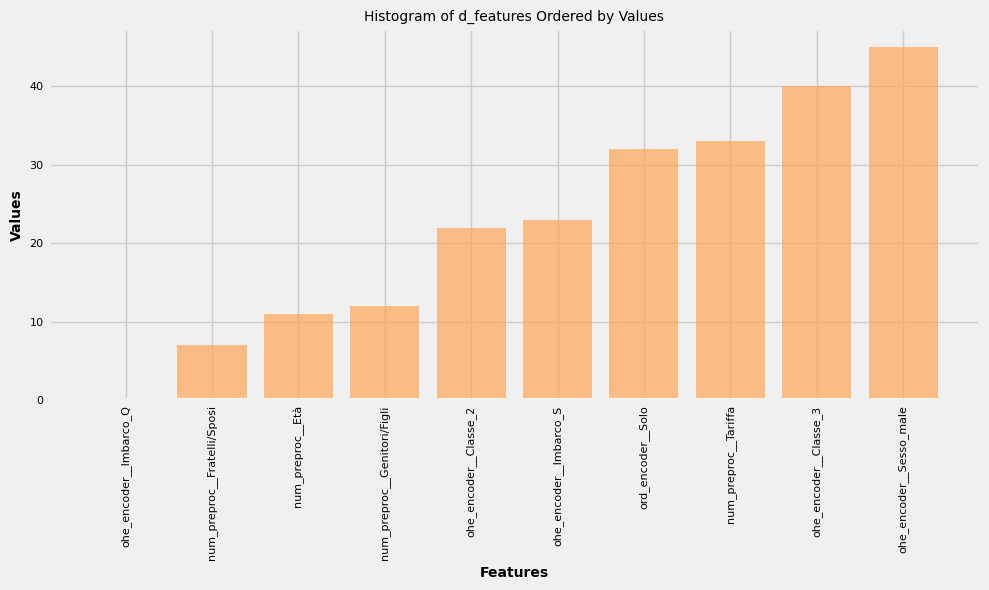

In [73]:
# Sort d_features by values
sorted_d_features = dict(sorted(d_features.items(), key=lambda item: item[1]))

# Plot the histogram using matplotlib object-oriented interface
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(sorted_d_features.keys(), sorted_d_features.values(), alpha=0.7)
# Set x-ticks and labels, axis labels, and title using the matplotlib object interface
ax.set_xticks(range(len(sorted_d_features)))
ax.set_xticklabels(list(sorted_d_features.keys()), rotation=90)
ax.set_xlabel('Features')
ax.set_ylabel('Values')
ax.set_title('Histogram of d_features Ordered by Values')
fig.tight_layout()
plt.show()

### Metodi multivariati: uso di classificatori 

Calcolo della significatività come risultato della classificazione da parte di una random forest

In [74]:
# Crea un classificatore ExtraTrees per valutare l'importanza delle feature
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)

# Costruisce una pipeline che:
# - Applica il preprocessing alle feature (scaling, encoding)
# - Allena il classificatore ExtraTrees
pipeline = Pipeline([
    ('preproc', preproc_pipeline),
    ('clf', forest)
])

# Allena la pipeline sui dati di training
pipeline.fit(X_train, y_train)

# Estrae l'importanza media delle feature dalla foresta addestrata
importances = pipeline.named_steps['clf'].feature_importances_

# Estrae l'importanza delle feature da ciascun albero della foresta
# (utile per analisi di varianza o distribuzione delle importanze)
feature_importances_per_tree = np.array([tree.feature_importances_ for tree in forest.estimators_])

# Crea un DataFrame con le importanze per ogni albero e i nomi delle feature trasformate
importances_df = pd.DataFrame(feature_importances_per_tree, columns=X_transformed_df.columns)

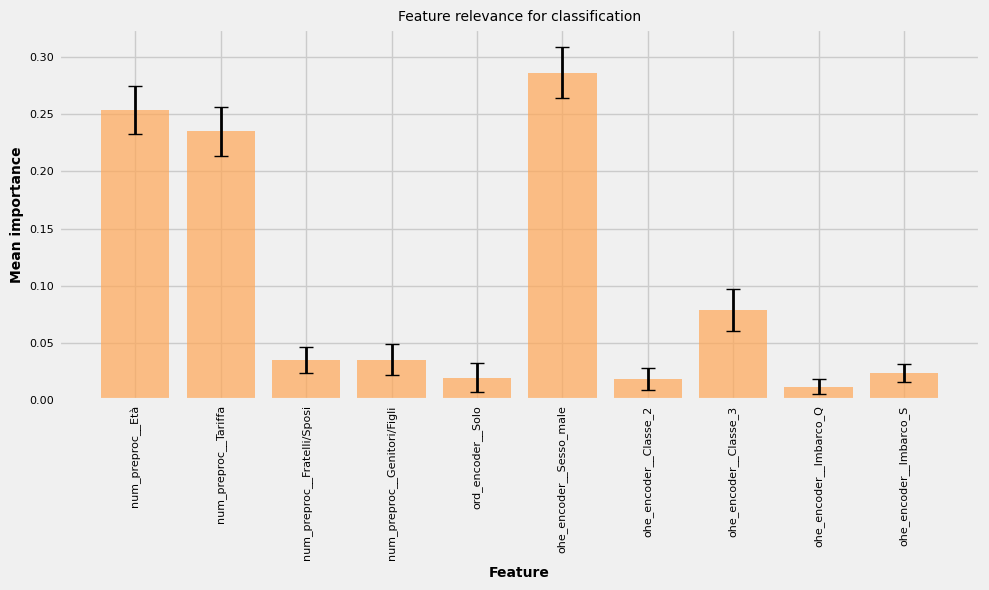

In [75]:
# Calcola la media e deviazione standard delle importanze delle feature per ogni colonna
dd = importances_df.agg(['mean', 'std']).T.reset_index()
dd.columns = ['Feature', 'Mean', 'Std']

# Crea la figura e l'asse con l'interfaccia a oggetti di matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

# Grafico a barre delle medie delle importanze con barre di errore (deviazione standard)
ax.bar(dd['Feature'], dd['Mean'], yerr=dd['Std'], alpha=0.7, capsize=5)
ax.set_title('Feature relevance for classification')
ax.set_ylabel('Mean importance')
ax.set_xlabel('Feature')
ax.set_xticklabels(dd['Feature'], rotation=90)
fig.tight_layout()
plt.show()

In [76]:
# Importa il selettore di feature sequenziale da scikit-learn
from sklearn.feature_selection import SequentialFeatureSelector

In [77]:
# Istanzia un classificatore ExtraTrees con 250 alberi e un seed per la riproducibilità.
# Questo classificatore verrà usato per valutare l'importanza delle feature o per selezione sequenziale.
estimator = ExtraTreesClassifier(n_estimators=250, random_state=0)

Selezione sequenziale delle features in avanti, mediante applicazione iterativa del classificatore su insiemi diversi di features, a partire da insiemi di una sola feature aggiungendo iterativamente la feature più promettente

In [78]:
# Numero di feature da selezionare con la selezione sequenziale
k = 5

# Costruisce una pipeline che:
# - Applica il preprocessing alle feature (scaling, encoding)
# - Seleziona le k feature migliori tramite selezione sequenziale in avanti (SequentialFeatureSelector)
# - Applica la regressione logistica come classificatore finale
pipeline = Pipeline([
    ('preproc', preproc_pipeline),
    ('feature_selection', SequentialFeatureSelector(
        estimator=estimator,           # Classificatore ExtraTrees già definito
        direction='forward',           # Selezione in avanti (aggiunge una feature alla volta)
        scoring='accuracy',            # Usa l'accuratezza come metrica di valutazione
        n_features_to_select=k         # Numero di feature da selezionare
    )),
    ('classifier', LogisticRegression(random_state=0))
])

# Allena la pipeline sui dati di training
pipeline.fit(X_train, y_train)

# Ottiene i nomi delle feature selezionate dopo il preprocessing
selected_features = X_transformed_df.columns[pipeline.named_steps['feature_selection'].get_support()]
print(f'Features selezionate: {sorted(selected_features)}')

# Stampa l'accuratezza della pipeline sui dati di test
print(f"Accuracy: {pipeline.score(X_test, y_test):.3f}")

Features selezionate: ['num_preproc__Fratelli/Sposi', 'ohe_encoder__Classe_3', 'ohe_encoder__Imbarco_Q', 'ohe_encoder__Sesso_male', 'ord_encoder__Solo']
Accuracy: 0.793


Selezione sequenziale delle features all'indietro, mediante applicazione iterativa del classificatore su insiemi diversi di features, a partire dall'insieme di tutte le feature rimuovendo iterativamente la feature meno significativa

In [79]:
# Numero di feature da selezionare con la selezione sequenziale all'indietro
k = 5

# Costruisce una pipeline che:
# - Applica il preprocessing alle feature (scaling, encoding)
# - Seleziona le k feature migliori tramite selezione sequenziale all'indietro (backward)
# - Applica la regressione logistica come classificatore finale
pipeline = Pipeline([
    ('preproc', preproc_pipeline),
    ('feature_selection', SequentialFeatureSelector(
        estimator=estimator,            # Classificatore ExtraTrees già definito
        direction='backward',           # Selezione all'indietro (rimuove una feature alla volta)
        scoring='accuracy',             # Usa l'accuratezza come metrica di valutazione
        n_features_to_select=k          # Numero di feature da selezionare
    )),
    ('classifier', LogisticRegression(random_state=0))
])

# Allena la pipeline sui dati di training
pipeline.fit(X_train, y_train)

# Ottiene i nomi delle feature selezionate dopo il preprocessing
selected_features = X_transformed_df.columns[pipeline.named_steps['feature_selection'].get_support()]
print(f'Features selezionate: {sorted(selected_features)}')

# Stampa l'accuratezza della pipeline sui dati di test
print(f"Accuracy: {pipeline.score(X_test, y_test):.3f}")

Features selezionate: ['num_preproc__Età', 'ohe_encoder__Classe_2', 'ohe_encoder__Classe_3', 'ohe_encoder__Imbarco_Q', 'ohe_encoder__Sesso_male']
Accuracy: 0.793


## Bilanciamento tra classi
Verifichiamo se le classi sono bilanciate

In [80]:
# Calcola e stampa il numero di sopravvissuti e non sopravvissuti, e la frazione di sopravvissuti

num_survived = df[df.Sopravvissuto == 1].shape[0]         # Numero di sopravvissuti
num_not_survived = df[df.Sopravvissuto == 0].shape[0]     # Numero di non sopravvissuti
frac_survived = num_survived / df.shape[0]                # Frazione di sopravvissuti

print(f'Numero di sopravvissuti: {num_survived}')
print(f'Numero di non sopravvissuti: {num_not_survived}')
print(f'Frazione di sopravvissuti: {frac_survived:3.2f}')

Numero di sopravvissuti: 342
Numero di non sopravvissuti: 549
Frazione di sopravvissuti: 0.38


Anche se c'è un certo sbilanciamento verso i non sopravvissuti, lo riteniamo accettabile

Deriviamo la matrice delle features e il vettore target

## Feature extraction

Possiamo ridurre la dimensionalità anche mediante feature extraction, ad esempio applicando PCA (trasformazioni lineari delle feature)

In [82]:
# Numero di componenti principali da estrarre
k = 5

# Costruisce una pipeline che:
# - Applica il preprocessing alle feature (scaling, encoding)
# - Applica PCA per ridurre la dimensionalità a k componenti principali
# - Applica la regressione logistica come classificatore finale
pipeline = Pipeline([
    ('preproc', preproc_pipeline),         # Preprocessing: scaling e encoding
    ('feature_extraction', PCA(n_components=k)),  # Estrazione delle k componenti principali
    ('classifier', LogisticRegression(random_state=0))  # Classificatore
])

# Allena la pipeline sui dati di training
pipeline = pipeline.fit(X_train, y_train)

In [84]:
# Ottiene la explained_variance_ratio_ dalla trasformazione PCA.
# Questo array mostra la frazione di varianza spiegata da ciascuna delle componenti principali estratte.
evr = pipeline.named_steps['feature_extraction'].explained_variance_ratio_

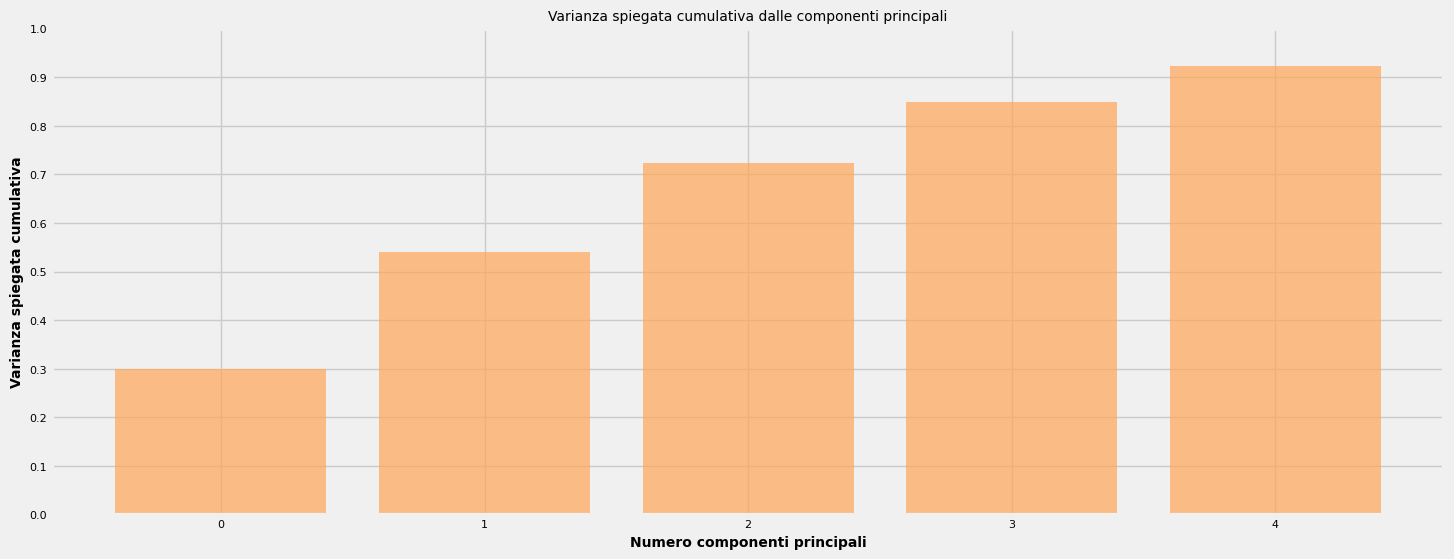

In [85]:
# Crea la figura e l'asse usando l'interfaccia a oggetti di matplotlib
fig, ax = plt.subplots(figsize=(16, 6))

# Traccia la somma cumulativa della varianza spiegata dalle componenti principali
ax.bar(range(evr.shape[0]), evr.cumsum(), alpha=0.7)

# Imposta i tick dell'asse x per ogni componente principale
ax.set_xticks(range(evr.shape[0]))

# Imposta i tick dell'asse y da 0 a 1 con passo 0.1
ax.set_yticks(np.linspace(0, 1, 11))

# Etichette e titolo
ax.set_xlabel('Numero componenti principali')
ax.set_ylabel('Varianza spiegata cumulativa')
ax.set_title('Varianza spiegata cumulativa dalle componenti principali')
plt.show()

In [86]:
# Estrae la media delle feature (dopo il preprocessing) utilizzata dalla PCA.
# La media è utile per capire il centroide dei dati trasformati prima della riduzione dimensionale.
# Crea un DataFrame con la media, usando i nomi delle feature trasformate come colonne.
means = pipeline.named_steps['feature_extraction'].mean_
feature_names = preproc_pipeline.get_feature_names_out()
means_df = pd.DataFrame([means], columns=feature_names)

# Visualizza le prime righe del DataFrame delle medie (in questo caso solo una riga)
means_df.head()

,num_preproc__Età,num_preproc__Tariffa,num_preproc__Fratelli/Sposi,num_preproc__Genitori/Figli,ord_encoder__Solo,ohe_encoder__Sesso_male,ohe_encoder__Classe_2,ohe_encoder__Classe_3,ohe_encoder__Imbarco_Q,ohe_encoder__Imbarco_S
0,0.362153,0.062192,0.066187,0.065309,0.603933,0.65309,0.205056,0.55618,0.089888,0.728933


In [87]:
# Estrae le componenti principali dalla PCA addestrata nella pipeline.
# Crea un DataFrame in cui ogni riga rappresenta una componente principale
# e ogni colonna rappresenta una feature trasformata dal pre-processing.
components = pipeline.named_steps['feature_extraction'].components_
feature_names = preproc_pipeline.get_feature_names_out()
components_df = pd.DataFrame(components, columns=feature_names)

# Visualizza le prime righe del DataFrame delle componenti principali
components_df.head()

,num_preproc__Età,num_preproc__Tariffa,num_preproc__Fratelli/Sposi,num_preproc__Genitori/Figli,ord_encoder__Solo,ohe_encoder__Sesso_male,ohe_encoder__Classe_2,ohe_encoder__Classe_3,ohe_encoder__Imbarco_Q,ohe_encoder__Imbarco_S
0,-0.019760,-0.054631,-0.045533,-0.069198,0.440926,0.386743,-0.427170,0.661879,0.130855,-0.089980
1,0.077634,-0.023409,-0.100142,-0.101341,0.521818,0.522192,0.341403,-0.360733,-0.185242,0.383600
2,-0.072746,-0.018850,0.123056,0.099860,-0.452541,0.152351,-0.123177,0.309388,-0.314327,0.729067
3,0.013634,0.042646,0.083104,0.052396,-0.501350,0.740387,-0.022962,-0.161822,0.046131,-0.399971
4,-0.186860,-0.157495,0.052664,0.035789,-0.080989,0.046784,0.778206,0.448159,0.347848,-0.005287


In [933]:
print(f"Accuracy: {pipeline.score(X_test, y_test):.3f}")

Accuracy: 0.788


## Prediction

### Naive Bayes
Classification is performed by creating a classifier and insert it in a pipeline, after a scaler

In [88]:
# Import StratifiedKFold for stratified cross-validation and cross_validate for model evaluation
from sklearn.model_selection import StratifiedKFold, cross_validate

In [90]:
# Crea una pipeline per la classificazione Naive Bayes con selezione delle feature
clf = Pipeline([
    ('preproc', preproc_pipeline),  # Preprocessing: scaling e encoding delle feature
    ('feature_selection', SelectKBest(score_func=f_classif, k=5)),  # Seleziona le 5 feature migliori tramite ANOVA F-test
    ('classifier', GaussianNB())  # Classificatore Naive Bayes gaussiano
])

# Definisce la strategia di cross-validation stratificata (5 fold, shuffle per randomizzazione)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Esegue la cross-validation calcolando l'AUC ROC su train e test
cv_results = cross_validate(
    clf, X_train, y_train,
    cv=skf,
    scoring='roc_auc',
    return_train_score=True
)

# Estrae i punteggi di training e test dalla cross-validation
train_scores = cv_results['train_score']
test_scores = cv_results['test_score']

# Stampa i risultati della cross-validation
print(f"Training ROC AUC scores: {train_scores}")
print(f"Mean training ROC AUC: {train_scores.mean():.3f}")
print(f"Std training ROC AUC: {train_scores.std():.3f}\n")

print(f"Test ROC AUC scores: {test_scores}")
print(f"Mean test ROC AUC: {test_scores.mean():.3f}")
print(f"Std test ROC AUC: {test_scores.std():.3f}")



Training ROC AUC scores: [0.80823466 0.8248582  0.81619378 0.80662556 0.81652679]
Mean training ROC AUC: 0.814
Std training ROC AUC: 0.007

Test ROC AUC scores: [0.82355372 0.7714876  0.81313131 0.84427609 0.81786834]
Mean test ROC AUC: 0.814
Std test ROC AUC: 0.024


In [91]:
from sklearn.svm import SVC

# Crea una pipeline per la classificazione SVM con selezione delle feature
clf = Pipeline([
    ('preproc', preproc_pipeline),  # Preprocessing: scaling e encoding delle feature
    ('feature_selection', SelectKBest(score_func=f_classif, k=5)),  # Seleziona le 5 feature migliori tramite ANOVA F-test
    ('classifier', SVC(kernel='rbf', probability=True, random_state=0))  # Classificatore SVM con kernel RBF
])

# Definisce la strategia di cross-validation stratificata (5 fold, shuffle per randomizzazione)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Esegue la cross-validation calcolando l'AUC ROC su train e test
cv_results = cross_validate(
    clf, X_train, y_train,
    cv=skf,
    scoring='roc_auc',
    return_train_score=True
)

# Estrae i punteggi di training e test dalla cross-validation
train_scores = cv_results['train_score']
test_scores = cv_results['test_score']

# Stampa i risultati della cross-validation
print(f"Training ROC AUC scores: {train_scores}")
print(f"Mean training ROC AUC: {train_scores.mean():.3f}")
print(f"Std training ROC AUC: {train_scores.std():.3f}\n")

print(f"Test ROC AUC scores: {test_scores}")
print(f"Mean test ROC AUC: {test_scores.mean():.3f}")
print(f"Std test ROC AUC: {test_scores.std():.3f}")

Training ROC AUC scores: [0.78054183 0.79827622 0.79788992 0.80285291 0.79860822]
Mean training ROC AUC: 0.796
Std training ROC AUC: 0.008

Test ROC AUC scores: [0.84834711 0.73946281 0.70686027 0.8030303  0.77753396]
Mean test ROC AUC: 0.775
Std test ROC AUC: 0.049


## Quanto bene si comporta il classificatore?

Come noto, possiamo utilizzare diverse metriche in questo contesto. Quelle che consideriamo si riferiscono ai seguenti valori:

* **Vero positivo** (*True positive*): il numero di passeggeri sopravvissuti (cioè appartenenti alla classe 1) classificati correttamente
* **Vero negativo** (*True negative*): il numero di passeggeri deceduti (cioè appartenenti alla classe 0) classificati correttamente
* **Falso positivo** (*False positive*): il numero di passeggeri deceduti (cioè appartenenti alla classe 0) classificati come sopravvissuti
* **Falso negativo** (*False negative*): il numero di passeggeri sopravvissuti (cioè appartenenti alla classe 1) classificati come deceduti

Questi valori possono essere rappresentati in una *matrice di confusione*. Per definizione, una matrice di confusione $C$ è tale che $C(i, j)$ corrisponde al numero di osservazioni che si sa appartengano al gruppo $i$, ma che sono state predette come appartenenti al gruppo $j$. In altre parole, le righe corrispondono alle classi reali, le colonne alle predizioni.


In [93]:
# Fit the classifier pipeline on the training data
# 'clf' is a scikit-learn Pipeline (with preprocessing, feature selection, and SVC)
# 'X_train' contains the training features, 'y_train' contains the training labels
clf.fit(X_train, y_train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num_preproc',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Età', 'Tariffa',
                                                   'Fratelli/Sposi',
                                                   'Genitori/Figli']),
                                                 ('ord_encoder',
                                                  OrdinalEncoder(), ['Solo']),
                                                 ('ohe_encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Sesso', 'Classe',
                                                   'Imbarco'])])),
                ('feature_selection', SelectKBest(k=5)),
                ('classifier', SVC(probability=True, random_state=0))])

In [94]:
# Effettua la predizione delle classi sul set di test utilizzando la pipeline 'clf'
# 'clf' include preprocessing, selezione delle feature e classificatore SVC
# 'X_test' contiene le feature del set di test
p_test = clf.predict(X_test)

In [96]:
from sklearn.metrics import confusion_matrix

# Calcola la matrice di confusione tra le etichette vere (y_test) e le predizioni (p_test)
# Nota: la funzione confusion_matrix richiede come primo argomento i valori reali e come secondo le predizioni

cm = confusion_matrix(y_test, p_test)

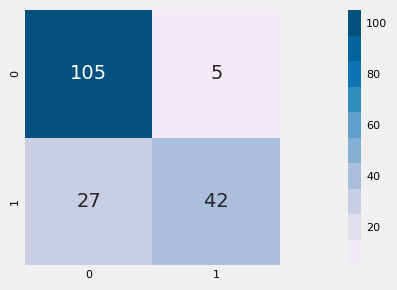

In [97]:
# Crea la figura e l'asse con l'interfaccia a oggetti di matplotlib
fig, ax = plt.subplots(figsize=(14, 3))

# Visualizza la matrice di confusione come heatmap
# - cbar=True: mostra la barra del colore
# - annot=True: annota ogni cella con il valore numerico
# - square=True: celle quadrate
# - fmt='d': formato intero per le annotazioni
# - annot_kws={'size': 14}: dimensione del font delle annotazioni
# - cmap: palette di colori "PuBu" con 10 livelli
# - ax=ax: disegna sull'asse creato
sns.heatmap(
    cm,
    cbar=True,
    annot=True,
    square=True,
    fmt='d',
    annot_kws={'size': 14},
    cmap=sns.color_palette("PuBu", 10),
    ax=ax
)

# Ottimizza il layout della figura per evitare sovrapposizioni
fig.tight_layout()
plt.show()

Per definizione, una matrice di confusione $C$ è tale che $C(i, j)$ è uguale al numero di osservazioni che si sa appartengano al gruppo i ma che sono state previste nel gruppo j. In altre parole, le righe corrispondono alle classi reali, mentre le colonne alle previsioni. Quindi, abbiamo:


In [98]:
# Print confusion matrix results with descriptive labels
# cm[1,1]: True Positives (actual 1, predicted 1)
print('{0:4d} true positives'.format(cm[1, 1]))
# cm[1,0]: False Negatives (actual 1, predicted 0)
print('{0:4d} false negatives'.format(cm[1, 0]))
# cm[0,1]: False Positives (actual 0, predicted 1)
print('{0:4d} false positives'.format(cm[0, 1]))
# cm[0,0]: True Negatives (actual 0, predicted 0)
print('{0:4d} true negatives'.format(cm[0, 0]))

  42 true positives
  27 false negatives
   5 false positives
 105 true negatives


La *Precision* è definita come il rapporto tra gli elementi predetti come positivi che sono effettivamente positivi:
$$P = \frac{TP}{TP + FP}$$
In questo caso, è il rapporto tra il numero di passeggeri sopravvissuti correttamente classificati e il numero totale di passeggeri classificati come sopravvissuti.

La *Recall* è definita come il rapporto tra gli elementi positivi che sono stati predetti come tali:
$$R = \frac{TP}{TP + FN}$$
In questo caso, è il rapporto tra il numero di passeggeri sopravvissuti correttamente classificati e il numero totale di passeggeri effettivamente sopravvissuti.

*F-score* è la media armonica tra precisione e richiamo:
$$F = (P^{-1} + R^{-1})^{-1}$$

La *Accuracy* è definita come il rapporto tra il numero di elementi correttamente classificati e il numero totale di elementi.





In [99]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calcola e stampa la precisione: frazione di predetti positivi che sono effettivamente positivi
precision = precision_score(y_test, p_test)
print(f'Precision = {precision:5.4f}')

# Calcola e stampa il recall: frazione di veri positivi trovati su tutti i positivi reali
recall = recall_score(y_test, p_test)
print(f'Recall = {recall:5.4f}')

# Calcola e stampa l'F-score: media armonica tra precision e recall
f1 = f1_score(y_test, p_test)
print(f'F-score = {f1:5.4f}')

# Calcola e stampa l'accuracy: frazione di predizioni corrette sul totale
accuracy = accuracy_score(y_test, p_test)
print(f'Accuracy = {accuracy:5.4f}')

Precision = 0.8936
Recall = 0.6087
F-score = 0.7241
Accuracy = 0.8212


Può essere interessante osservare precision, recall e f-score per entrambe le classi (sopravvissuti e non)

In [100]:
from sklearn.metrics import precision_recall_fscore_support

# Calcola precision, recall, f-score e supporto per ciascuna classe (0 e 1)
# y_test: etichette vere, p_test: etichette predette
# average=None restituisce i valori per ogni classe separatamente
precision, recall, fscore, support = precision_recall_fscore_support(y_test, p_test, average=None)

# Raggruppa i risultati in una matrice per una visualizzazione compatta
m = np.array([precision, recall, fscore, support])

# Visualizza la matrice delle metriche per entrambe le classi
print("Precision, Recall, F-score, Support per ciascuna classe (0=non sopravvissuto, 1=sopravvissuto):")
print(m)

Precision, Recall, F-score, Support per ciascuna classe (0=non sopravvissuto, 1=sopravvissuto):
[[  0.79545455   0.89361702]
 [  0.95454545   0.60869565]
 [  0.8677686    0.72413793]
 [110.          69.        ]]


In [101]:
from sklearn.metrics import accuracy_score

# Stampa precision, recall e f-score per ciascuna classe (0=non sopravvissuto, 1=sopravvissuto)
print('Precision class 0 = {0:5.4f}'.format(m[0][0]))  # Precisione per la classe 0
print('Precision class 1 = {0:5.4f}'.format(m[0][1]))  # Precisione per la classe 1

print('Recall class 0 = {0:5.4f}'.format(m[1][0]))     # Recall per la classe 0
print('Recall class 1 = {0:5.4f}'.format(m[1][1]))     # Recall per la classe 1

print('F-score class 0 = {0:5.4f}'.format(m[2][0]))    # F-score per la classe 0
print('F-score class 1 = {0:5.4f}'.format(m[2][1]))    # F-score per la classe 1

# Calcola e stampa l'accuracy globale (corrette su totale)
print('Accuracy = {0:5.4f}'.format(accuracy_score(y_test, p_test)))

Precision class 0 = 0.7955
Precision class 1 = 0.8936
Recall class 0 = 0.9545
Recall class 1 = 0.6087
F-score class 0 = 0.8678
F-score class 1 = 0.7241
Accuracy = 0.8212


Il modello può fornire anche una misura della confidenza sulle predizioni effettuate, sotto forma di probabilità. 

*class probabilities*: la probabilità stimata che il passeggero sia sopravvissuto

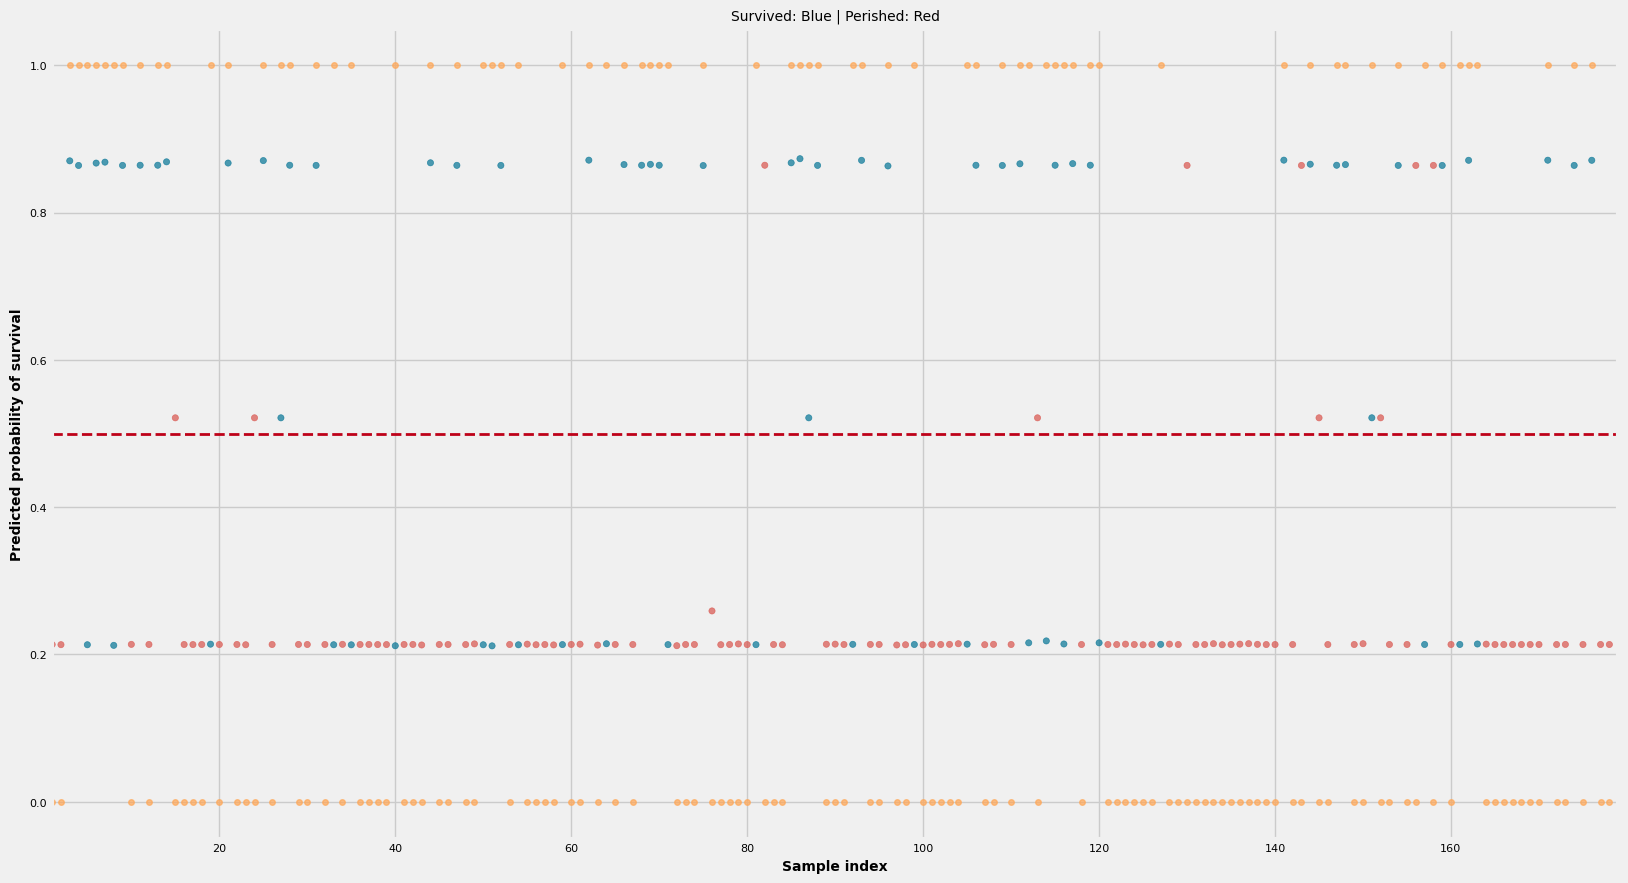

In [102]:
clf.fit(X_train, y_train)
y_prob = clf.predict_proba(X_test)
# Assign colors based on true class: blue for survived (1), red for perished (0)
c = [colors[1] if x == 1 else colors[2] for x in y_test]

# Create the figure and axis using the matplotlib object-oriented interface
fig, ax = plt.subplots(figsize=(18, 10))

# Scatter plot: predicted probability of survival for each passenger, colored by true class
ax.scatter(
    range(y_prob.shape[0]),      # x: index of each test sample
    y_prob[:, 1],                # y: predicted probability of class 1 (survived)
    color=c, s=20, marker='o', alpha=0.7
)

# Overlay the true class labels as points (0 or 1) for visual reference
ax.plot(
    range(y_prob.shape[0]),
    y_test,
    color=colors[0], ms=4, marker='o', linestyle=' ', alpha=0.7
)

# Draw a horizontal dashed line at probability 0.5 (typical decision threshold)
ax.axhline(y=0.5, xmin=0, xmax=1, linewidth=2, linestyle='dashed', color=colors[9])

# Set axis limits and labels
ax.set_xlim(1, y_prob.shape[0])
ax.set_title('Survived: Blue | Perished: Red')
ax.set_xlabel('Sample index')
ax.set_ylabel('Predicted probability of survival')
plt.show()

Una curva ROC (Receiver Operating Characteristic) rappresenta, per ogni valore della soglia applicata alle probabilità di classificazione, il rapporto $\frac{FP}{N}=\frac{FP}{TN+FP}$ degli elementi negativi classificati erroneamente come positivi (*False positive rate*) e il rapporto $\frac{TP}{P}=\frac{TP}{TP+FN}$ degli elementi positivi correttamente classificati come positivi (*True positive rate*).

Il punto ideale è (0,1): nessun elemento negativo classificato erroneamente e tutti gli elementi positivi classificati correttamente.


In [103]:
from sklearn.metrics import roc_curve

# Calcola le curve ROC (Receiver Operating Characteristic) per il classificatore 'clf'
# - y_test: etichette vere del set di test
# - clf.predict_proba(X_test)[:, 1]: probabilità predetta per la classe positiva (sopravvissuto)
# - pos_label=1: la classe positiva è '1' (sopravvissuto)

fpr, tpr, thresholds = roc_curve(
    y_test,                      # etichette vere
    clf.predict_proba(X_test)[:, 1],  # probabilità predetta per la classe 1
    pos_label=1                  # specifica la classe positiva
)

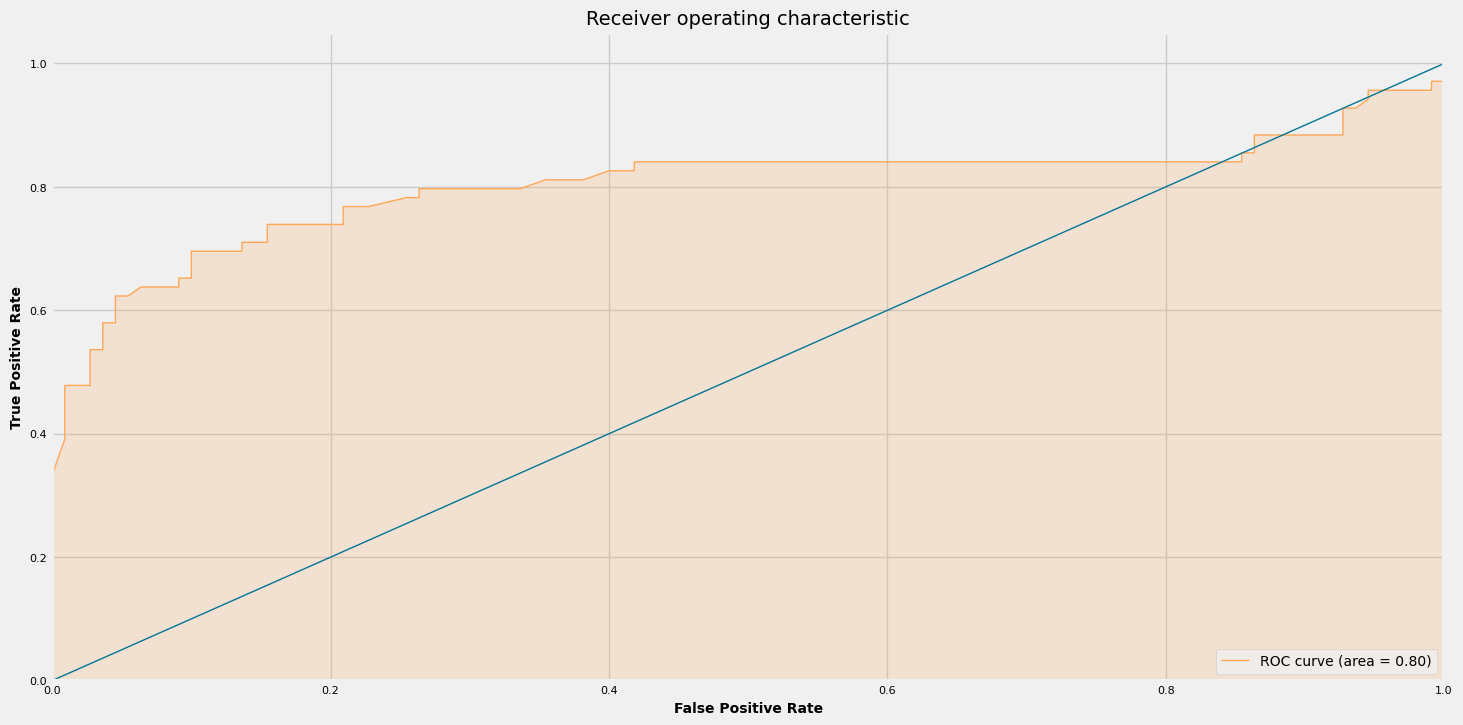

In [104]:
from sklearn.metrics import auc

# Crea la figura e l'asse usando l'interfaccia a oggetti di matplotlib
fig, ax = plt.subplots(figsize=(16, 8))

# Calcola l'area sotto la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Traccia la curva ROC: True Positive Rate (TPR) vs False Positive Rate (FPR)
ax.plot(
    fpr, tpr,
    color=colors[0],
    linewidth=1,
    label=f'ROC curve (area = {roc_auc:.2f})'
)

# Riempie l'area sotto la curva ROC per evidenziare la regione
ax.fill_between(fpr, 0, tpr, alpha=0.2)

# Traccia la diagonale di riferimento (classificatore casuale)
ax.plot([0, 1], [0, 1], color=colors[1], linewidth=1)

# Imposta i limiti degli assi
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])

# Etichette degli assi e titolo
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic', fontsize=14)

# Mostra la legenda in basso a destra
ax.legend(loc="lower right")

# Ottimizza il layout e mostra il grafico
plt.show()

L'Area sotto la curva (AUC) fornisce una misura della qualità del classificatore. Più precisamente, essa corrisponde alla probabilità che un classificatore assegni un punteggio più alto a un elemento positivo scelto a caso rispetto a un elemento negativo scelto a caso (cioè, che gli attribuisca una probabilità maggiore di essere positivo).


In [105]:
# Calcola e stampa l'AUC (Area Under the Curve) della curva ROC
# Utilizza la funzione auc di sklearn.metrics, già importata e i valori fpr e tpr già calcolati
auc_value = auc(fpr, tpr)
print(f'AUC = {auc_value:0.4f}')

AUC = 0.8023


In [106]:
from sklearn.metrics import roc_auc_score

# Calcola e restituisce l'AUC ROC (Area Under the Curve - Receiver Operating Characteristic)
# tra le etichette vere (y_test) e le probabilità predette per la classe positiva (sopravvissuto)
auc_roc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print(f"AUC ROC: {auc_roc:.4f}")

AUC ROC: 0.8023


In [109]:
# Trova l'indice della soglia ottimale per la classificazione ROC
# La soglia ottimale massimizza la differenza tra True Positive Rate (TPR) e False Positive Rate (FPR)
optimal_idx = np.argmax(tpr - fpr)

# Estrae il valore della soglia ottimale corrispondente
optimal_threshold = thresholds[optimal_idx]

In [110]:
# Print the optimal threshold for classification, formatted to 3 decimal places.
# The optimal threshold is the value that maximizes the difference (TPR - FPR) on the ROC curve.
print(f'Optimal threshold: {optimal_threshold:.3f}')

Optimal threshold: 0.216


Effetta le predizioni applicando la nuova threshold

In [111]:
pred_proba_df = pd.DataFrame(clf.predict_proba(X_test)[:,1])
# Applica la soglia ottimale alle probabilità predette per ottenere le classi predette (0 o 1)
# La funzione lambda restituisce 1 se la probabilità supera la soglia ottimale, altrimenti 0
p = pred_proba_df.applymap(lambda x: 1 if x > optimal_threshold else 0)

In [112]:
# Calcola la matrice di confusione tra le etichette vere (y_test) e le predizioni ottenute con la soglia ottimale.
# Nota: 'p' è un DataFrame con una sola colonna, quindi occorre convertirlo in un array 1D per la funzione confusion_matrix.
cm = confusion_matrix(y_test, p[0].values)

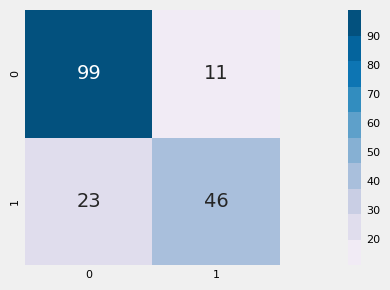

In [113]:
# Crea la figura e l'asse usando l'interfaccia a oggetti di matplotlib
fig, ax = plt.subplots(figsize=(14, 3))

# Visualizza la matrice di confusione 'cm' come heatmap
sns.heatmap(
    cm,                                 # matrice di confusione da visualizzare
    cbar=True,                          # mostra la barra del colore
    annot=True,                         # annota ogni cella con il valore numerico
    square=True,                        # celle quadrate
    fmt='d',                            # formato intero per le annotazioni
    annot_kws={'size': 14},             # dimensione del font delle annotazioni
    cmap=sns.color_palette("PuBu", 10), # palette di colori
    ax=ax                               # disegna sull'asse creato
)

# Ottimizza il layout della figura per evitare sovrapposizioni
fig.tight_layout()

# Mostra la figura
plt.show()

In [114]:
from sklearn.metrics import precision_recall_fscore_support

# Calcola precision, recall, f-score e supporto per ciascuna classe (0 e 1)
# precision_recall_fscore_support richiede come primo argomento i valori reali e come secondo le predizioni
# Qui 'y_test' sono le etichette vere, 'p[0].values' sono le predizioni (array 1D)

m = precision_recall_fscore_support(y_test, p[0].values)

In [115]:
from sklearn.metrics import accuracy_score

# Stampa precision, recall, f-score per ciascuna classe (0=non sopravvissuto, 1=sopravvissuto)
print('Precision class 0 = {0:5.4f}'.format(m[0][0]))  # Precisione per la classe 0
print('Precision class 1 = {0:5.4f}'.format(m[0][1]))  # Precisione per la classe 1

print('Recall class 0 = {0:5.4f}'.format(m[1][0]))     # Recall per la classe 0
print('Recall class 1 = {0:5.4f}'.format(m[1][1]))     # Recall per la classe 1

print('F-score class 0 = {0:5.4f}'.format(m[2][0]))    # F-score per la classe 0
print('F-score class 1 = {0:5.4f}'.format(m[2][1]))    # F-score per la classe 1

# Calcola e stampa l'accuracy globale (corrette su totale)
print('Accuracy = {0:5.4f}'.format(accuracy_score(y_test, p[0].values)))

Precision class 0 = 0.8115
Precision class 1 = 0.8070
Recall class 0 = 0.9000
Recall class 1 = 0.6667
F-score class 0 = 0.8534
F-score class 1 = 0.7302
Accuracy = 0.8101


Perform predictions on both training and test set

In [116]:
# Effettua le predizioni delle classi sia sul set di training che sul set di test utilizzando la pipeline 'clf'
# 'clf' include preprocessing, selezione delle feature e classificatore
# 'X_train' contiene le feature del set di training, 'X_test' quelle del set di test

p_train = clf.predict(X_train)  # Predizioni sul training set
p_test = clf.predict(X_test)    # Predizioni sul test set

Compute measures in both cases

In [117]:
# Calcola le matrici di confusione per il training set e il test set.
# y_train: etichette vere del training set
# p_train: predizioni del modello sul training set
cm_train = confusion_matrix(y_train, p_train)

# y_test: etichette vere del test set
# p_test: predizioni del modello sul test set
cm_test = confusion_matrix(y_test, p_test)

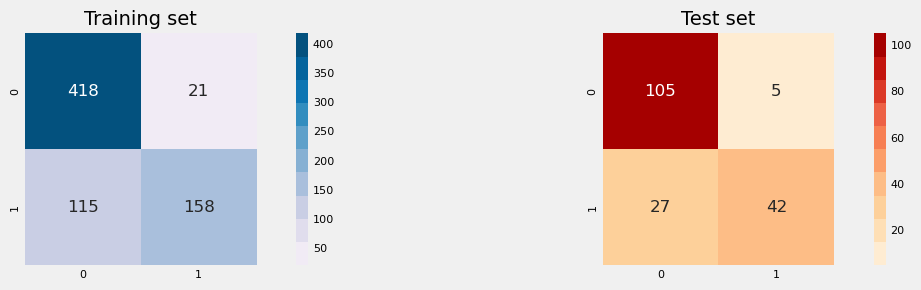

In [118]:
# Create a figure with two subplots (side by side) to compare confusion matrices for train and test sets
fig, axes = plt.subplots(1, 2, figsize=(14, 3))

# Plot confusion matrix for the training set
sns.heatmap(
    cm_train,                           # Confusion matrix for training set
    cbar=True,                          # Show color bar
    annot=True,                         # Annotate cells with numbers
    square=True,                        # Square cells
    fmt='d',                            # Integer format for annotations
    annot_kws={'size': 12},             # Annotation font size
    cmap=sns.color_palette("PuBu", 10), # Color palette for training set
    ax=axes[0]                          # Plot on the first subplot
)
axes[0].set_title('Training set', fontsize=14)

# Plot confusion matrix for the test set
sns.heatmap(
    cm_test,                            # Confusion matrix for test set
    cbar=True,
    annot=True,
    square=True,
    fmt='d',
    annot_kws={'size': 12},
    cmap=sns.color_palette("OrRd", 10), # Different color palette for test set
    ax=axes[1]
)
axes[1].set_title('Test set', fontsize=14)

# Adjust layout to prevent overlap
fig.tight_layout()
plt.show()

In [119]:
# Calcola precision, recall, f-score e supporto per ciascuna classe (0 e 1) sul training set
m_train = precision_recall_fscore_support(y_train, p_train)

# Calcola precision, recall, f-score e supporto per ciascuna classe (0 e 1) sul test set
m_test = precision_recall_fscore_support(y_test, p_test)

In [120]:
# Print classification metrics for the TRAINING SET

print('TRAINING SET')

# Precision: fraction of predicted positives that are actually positive (per class)
print('Precision class 0 = {0:5.4f}'.format(m_train[0][0]))
print('Precision class 1 = {0:5.4f}'.format(m_train[0][1]))

# Recall: fraction of actual positives that are correctly predicted (per class)
print('Recall class 0 = {0:5.4f}'.format(m_train[1][0]))
print('Recall class 1 = {0:5.4f}'.format(m_train[1][1]))

# F-score: harmonic mean of precision and recall (per class)
print('F-score class 0 = {0:5.4f}'.format(m_train[2][0]))
print('F-score class 1 = {0:5.4f}'.format(m_train[2][1]))

# Accuracy: overall fraction of correct predictions
print('Accuracy = {0:5.4f}'.format(accuracy_score(y_train, p_train)))

TRAINING SET
Precision class 0 = 0.7842
Precision class 1 = 0.8827
Recall class 0 = 0.9522
Recall class 1 = 0.5788
F-score class 0 = 0.8601
F-score class 1 = 0.6991
Accuracy = 0.8090


In [121]:
# Print classification metrics for the TEST SET

print('TEST SET')

# Precision: fraction of predicted positives that are actually positive (per class)
print('Precision class 0 = {0:5.4f}'.format(m_test[0][0]))
print('Precision class 1 = {0:5.4f}'.format(m_test[0][1]))

# Recall: fraction of actual positives that are correctly predicted (per class)
print('Recall class 0 = {0:5.4f}'.format(m_test[1][0]))
print('Recall class 1 = {0:5.4f}'.format(m_test[1][1]))

# F-score: harmonic mean of precision and recall (per class)
print('F-score class 0 = {0:5.4f}'.format(m_test[2][0]))
print('F-score class 1 = {0:5.4f}'.format(m_test[2][1]))

# Accuracy: overall fraction of correct predictions
print('Accuracy = {0:5.4f}'.format(accuracy_score(y_test, p_test)))

TEST SET
Precision class 0 = 0.7955
Precision class 1 = 0.8936
Recall class 0 = 0.9545
Recall class 1 = 0.6087
F-score class 0 = 0.8678
F-score class 1 = 0.7241
Accuracy = 0.8212


In [122]:
# Calcola le probabilità predette dal classificatore 'clf' sul training set
y_prob = clf.predict_proba(X_train)

# Calcola e stampa l'AUC ROC (Area Under the Curve - Receiver Operating Characteristic)
# tra le etichette vere del training set (y_train) e le probabilità predette per la classe positiva (colonna 1)
auc_train = roc_auc_score(y_train, y_prob[:, 1])
print(f'AUC ROC (train set): {auc_train:.3f}')

AUC ROC (train set): 0.789


In [123]:
# Calcola la curva ROC (Receiver Operating Characteristic) sull'intero dataset X, y
# fpr: False Positive Rate, tpr: True Positive Rate, thresholds: soglie di classificazione
fpr, tpr, thresholds = roc_curve(y, clf.predict_proba(X)[:, 1], pos_label=1)

# Trova l'indice della soglia ottimale che massimizza la differenza (TPR - FPR)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Calcola le probabilità predette per la classe positiva e crea un DataFrame
pred_proba_df = pd.DataFrame(clf.predict_proba(X)[:, 1])

# Applica la soglia ottimale per ottenere le predizioni finali (0 o 1)
p = pred_proba_df.applymap(lambda x: 1 if x > optimal_threshold else 0)

# Stampa la soglia ottimale trovata
print(f'Optimal threshold: {optimal_threshold:.3f}')

Optimal threshold: 0.214


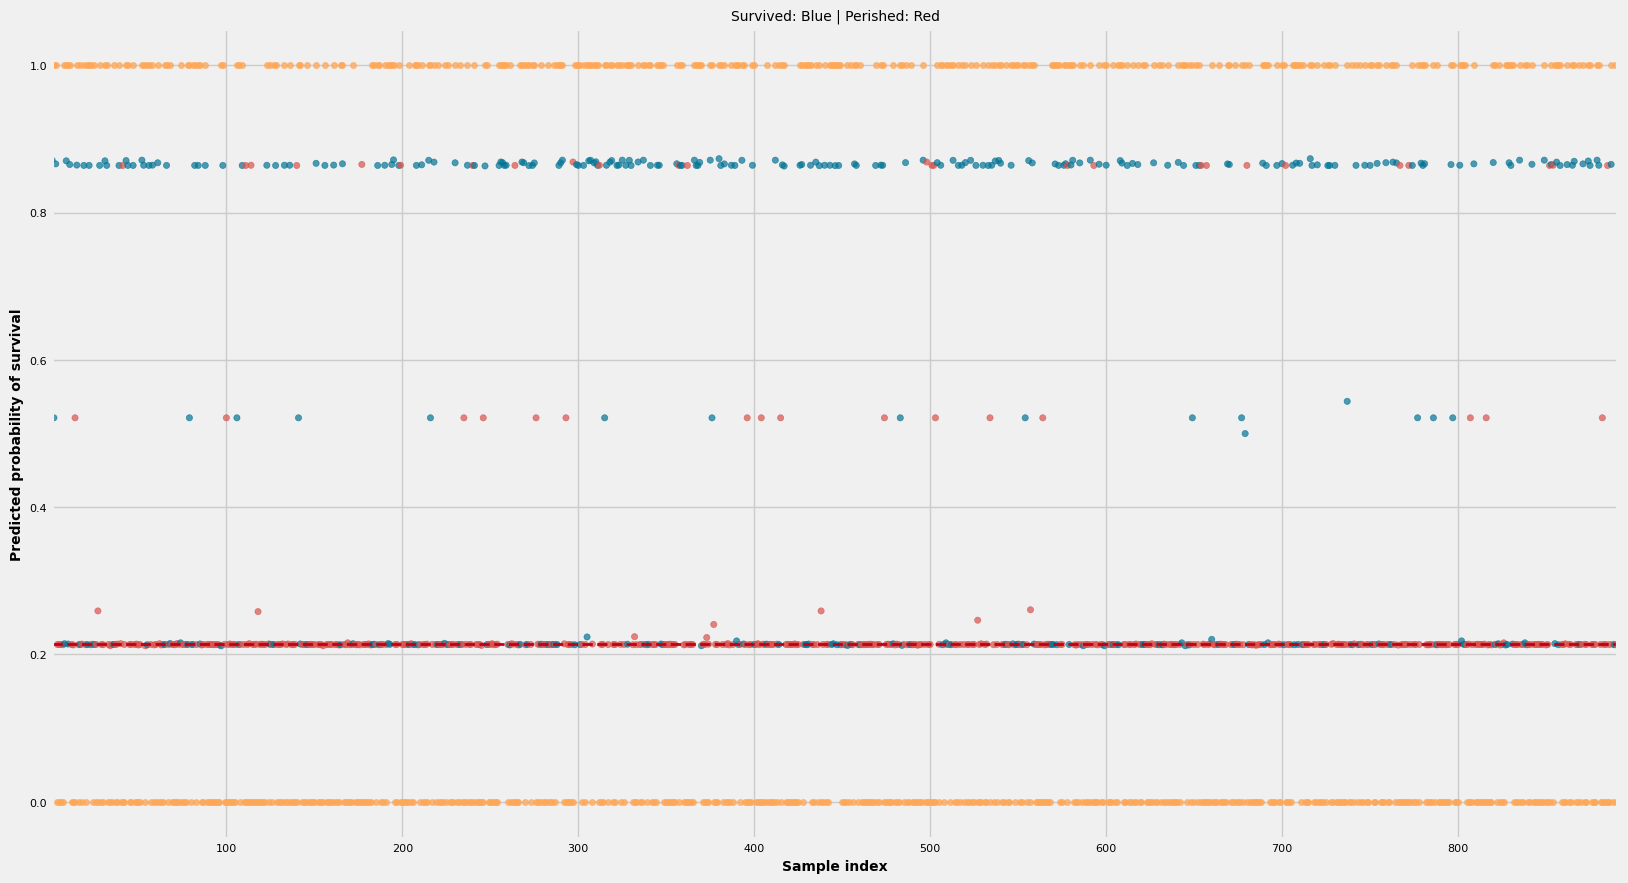

In [124]:
# Plot predicted probabilities vs actual classes using matplotlib object-oriented interface

# Compute predicted probabilities for the positive class (survived)
y_prob = clf.predict_proba(X)[:, 1]

# Assign colors: blue for survived (1), red for perished (0)
c = [colors[1] if label == 1 else colors[2] for label in y]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(18, 10))

# Scatter plot: predicted probability for each passenger, colored by true class
ax.scatter(
    range(len(y_prob)),    # x: sample index
    y_prob,                # y: predicted probability of survival
    color=c, s=20, marker='o', alpha=0.7
)

# Overlay the true class labels as points (0 or 1) for visual reference
ax.plot(
    range(len(y)), y,
    color=colors[0], ms=4, marker='o', linestyle=' ', alpha=0.7
)

# Draw a horizontal dashed line at the optimal threshold
ax.axhline(
    y=optimal_threshold, xmin=0, xmax=1,
    linewidth=2, linestyle='dashed', color=colors[9]
)

# Set axis limits and labels
ax.set_xlim(1, len(y_prob))
ax.set_xlabel('Sample index')
ax.set_ylabel('Predicted probability of survival')
ax.set_title('Survived: Blue | Perished: Red')

plt.show()

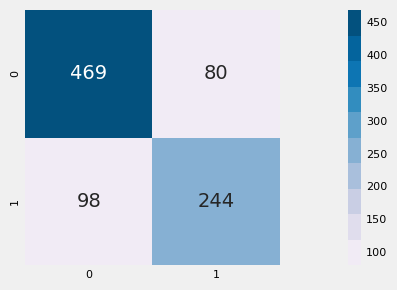

In [125]:
# Calcola la matrice di confusione tra le etichette vere (y) e le predizioni (p)
cm = confusion_matrix(y, p)

# Crea la figura e l'asse usando l'interfaccia a oggetti di matplotlib
fig, ax = plt.subplots(figsize=(14, 3))

# Visualizza la matrice di confusione come heatmap
sns.heatmap(
    cm,
    cbar=True,                # Mostra la barra del colore
    annot=True,               # Annotazioni numeriche nelle celle
    square=True,              # Celle quadrate
    fmt='d',                  # Formato intero per le annotazioni
    annot_kws={'size': 14},   # Dimensione del font delle annotazioni
    cmap=sns.color_palette("PuBu", 10),  # Palette di colori
    ax=ax                     # Usa l'asse creato
)

# Ottimizza il layout della figura
fig.tight_layout()
plt.show()

In [126]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Calcola precision, recall, f-score e supporto per ciascuna classe (0 e 1)
# y: etichette vere, p: predizioni (devono essere array 1D o simili)
m = precision_recall_fscore_support(y, p)

# Stampa precision, recall, f-score per ciascuna classe
print('Precision class 0 = {0:5.4f}'.format(m[0][0]))
print('Precision class 1 = {0:5.4f}'.format(m[0][1]))
print('Recall class 0 = {0:5.4f}'.format(m[1][0]))
print('Recall class 1 = {0:5.4f}'.format(m[1][1]))
print('F-score class 0 = {0:5.4f}'.format(m[2][0]))
print('F-score class 1 = {0:5.4f}'.format(m[2][1]))

# Calcola e stampa l'accuracy globale (frazione di predizioni corrette)
print('Accuracy = {0:5.4f}'.format(accuracy_score(y, p)))

Precision class 0 = 0.8272
Precision class 1 = 0.7531
Recall class 0 = 0.8543
Recall class 1 = 0.7135
F-score class 0 = 0.8405
F-score class 1 = 0.7327
Accuracy = 0.8002


### Logistic regression

In [127]:
# Create a pipeline for logistic regression with feature selection
clf = Pipeline([
    ('preproc', preproc_pipeline),  # Standardize and encode features
    ('feature_selection', SelectKBest(score_func=f_classif, k=5)),  # Select top 5 features using ANOVA F-test
    ('classifier', LogisticRegression())  # Logistic Regression classifier
])

# Stratified K-Fold cross-validation (already defined as 'skf')
# Evaluate multiple metrics: precision, recall, accuracy, f1, roc_auc
cv_results = cross_validate(
    clf,
    X_train,
    y_train,
    cv=skf,
    scoring=('precision', 'recall', 'accuracy', 'f1', 'roc_auc'),
    return_train_score=True
)

# Extract ROC AUC scores for training and test sets
train_scores = cv_results['train_roc_auc']
test_scores = cv_results['test_roc_auc']

# Print training ROC AUC statistics
print(f"Training ROC AUC scores: {train_scores}")
print(f"Mean training ROC AUC: {train_scores.mean():.3f}")
print(f"Std training ROC AUC: {train_scores.std():.3f}\n")

# Print test ROC AUC statistics
print(f"Test ROC AUC scores: {test_scores}")
print(f"Mean test ROC AUC: {test_scores.mean():.3f}")
print(f"Std test ROC AUC: {test_scores.std():.3f}")

Training ROC AUC scores: [0.82539402 0.8397828  0.8351351  0.82798657 0.83518818]
Mean training ROC AUC: 0.833
Std training ROC AUC: 0.005

Test ROC AUC scores: [0.85640496 0.79938017 0.80787037 0.85037879 0.81556949]
Mean test ROC AUC: 0.826
Std test ROC AUC: 0.023


In [128]:
# Calcola e stampa l'AUC media sui fold di test della cross-validation
# 'cv_results' contiene i risultati della cross-validation, inclusi i punteggi ROC AUC per il test set
mean_auc = cv_results['test_roc_auc'].mean()  # Calcola la media dei punteggi ROC AUC sui fold di test
print(f'AUC: {mean_auc:.3f}')  # Stampa l'AUC media con 3 cifre decimali

AUC: 0.826


In [129]:
# Print the mean test accuracy from cross-validation results.
# 'cv_results' is a dictionary returned by cross_validate, containing 'test_accuracy' for each fold.
mean_test_accuracy = cv_results['test_accuracy'].mean()
print('Accuracy: {0:.3f}'.format(mean_test_accuracy))

Accuracy: 0.789


In [130]:
# Fit the classifier 'clf' on the training data (X_train, y_train)
# This trains the model so it can be used for predictions and evaluation
clf.fit(X_train, y_train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num_preproc',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Età', 'Tariffa',
                                                   'Fratelli/Sposi',
                                                   'Genitori/Figli']),
                                                 ('ord_encoder',
                                                  OrdinalEncoder(), ['Solo']),
                                                 ('ohe_encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Sesso', 'Classe',
                                                   'Imbarco'])])),
                ('feature_selection', SelectKBest(k=5)),
                ('classifier', LogisticRegression())])

In [131]:
# Calcola la curva ROC sui dati di training: fpr (False Positive Rate), tpr (True Positive Rate), thresholds (soglie)
fpr, tpr, thresholds = roc_curve(y_train, clf.predict_proba(X_train)[:, 1], pos_label=1)

# Trova l'indice della soglia ottimale che massimizza la differenza tra TPR e FPR
optimal_idx = np.argmax(tpr - fpr)

# Estrae il valore della soglia ottimale corrispondente
optimal_threshold = thresholds[optimal_idx]

# Calcola le probabilità predette per la classe positiva sul training set
pred_proba = clf.predict_proba(X_train)[:, 1]

# Applica la soglia ottimale per ottenere le predizioni finali (0 o 1)
p = (pred_proba > optimal_threshold).astype(int)

# Stampa la soglia ottimale trovata
print(f'Optimal threshold: {optimal_threshold:.3f}')

Optimal threshold: 0.552


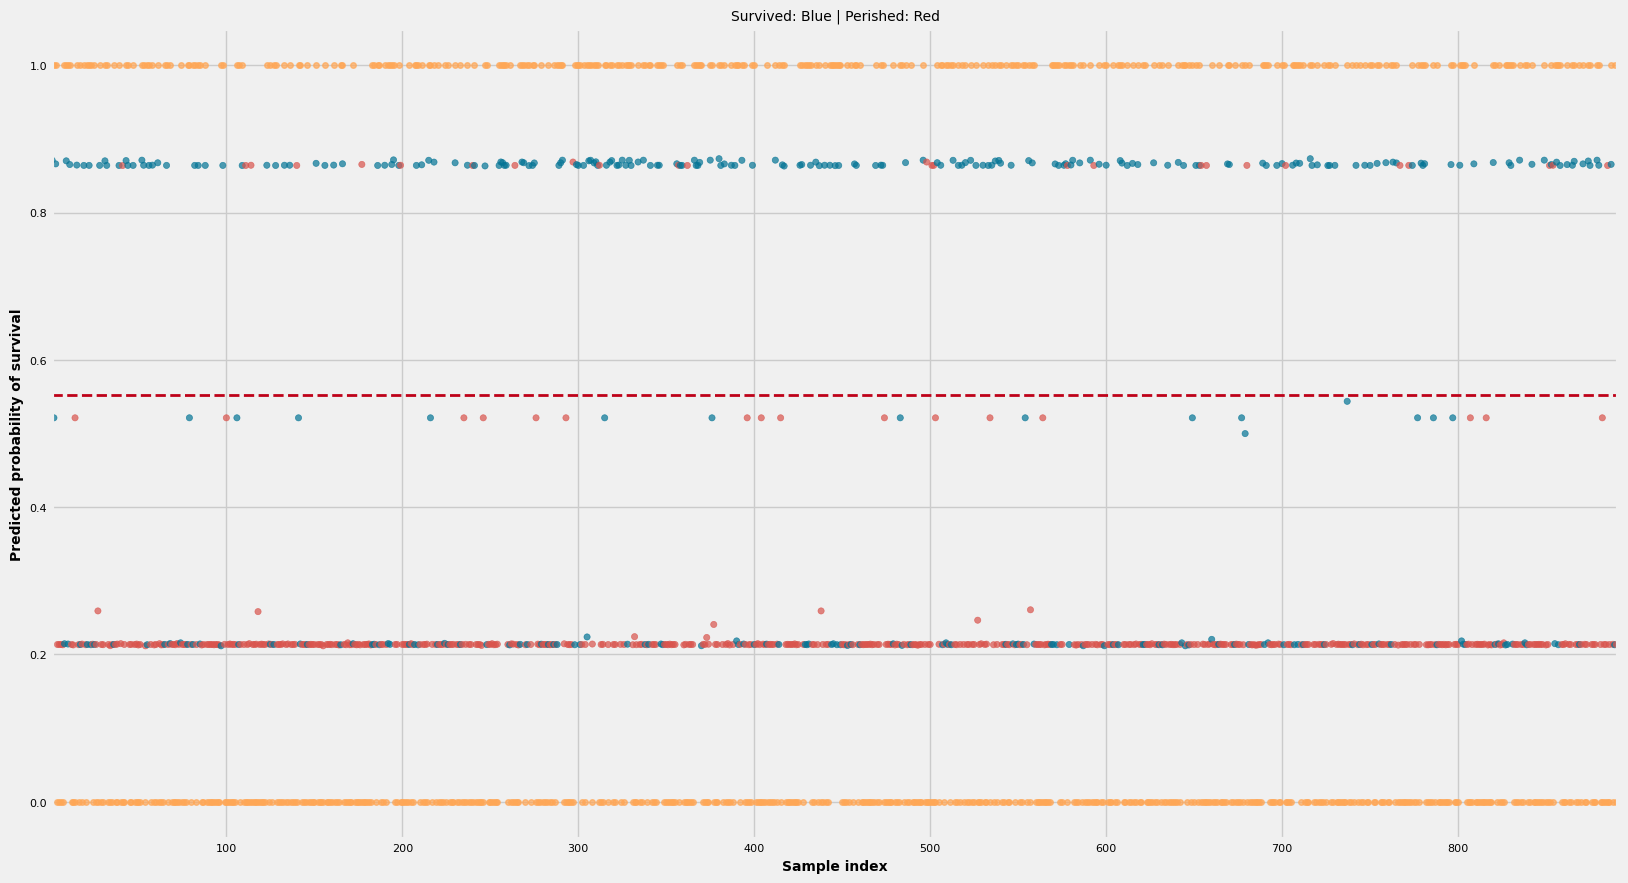

In [132]:
# Plot predicted probabilities vs actual classes using matplotlib object-oriented interface

# Extract predicted probabilities as a 1D numpy array
y_prob = pred_proba_df[0].values

# Assign colors: blue for survived (1), red for perished (0)
c = [colors[1] if label == 1 else colors[2] for label in y]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(18, 10))

# Scatter plot: predicted probability for each passenger, colored by true class
ax.scatter(
    range(len(y_prob)),    # x: sample index
    y_prob,                # y: predicted probability of survival
    color=c, s=20, marker='o', alpha=0.7
)

# Overlay the true class labels as points (0 or 1) for visual reference
ax.plot(
    range(len(y)), y,
    color=colors[0], ms=4, marker='o', linestyle=' ', alpha=0.7
)

# Draw a horizontal dashed line at the optimal threshold
ax.axhline(
    y=optimal_threshold, xmin=0, xmax=1,
    linewidth=2, linestyle='dashed', color=colors[9]
)

# Set axis limits and labels
ax.set_xlim(1, len(y_prob))
ax.set_xlabel('Sample index')
ax.set_ylabel('Predicted probability of survival')
ax.set_title('Survived: Blue | Perished: Red')

plt.show()

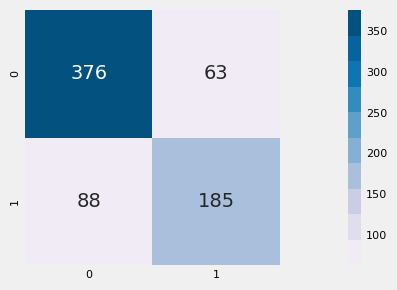

In [133]:
# Compute the confusion matrix between true labels (y_train) and predicted classes (p)
cm = confusion_matrix(y_train, p)

# Create the figure and axis using the matplotlib object-oriented interface
fig, ax = plt.subplots(figsize=(14, 3))

# Plot the confusion matrix as a heatmap with annotations and color bar
hm = sns.heatmap(
    cm,
    cbar=True,                # Show color bar
    annot=True,               # Annotate each cell with the numeric value
    square=True,              # Make cells square
    fmt='d',                  # Integer format for annotations
    annot_kws={'size': 14},   # Annotation font size
    cmap=sns.color_palette("PuBu", 10),  # Color palette
    ax=ax                     # Use the created axis
)

# Optimize layout to prevent overlap
fig.tight_layout()
plt.show()

In [134]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Calcola precision, recall, f-score e accuracy tra le etichette vere (y_train) e le predizioni (p)
# Nota: la funzione precision_recall_fscore_support richiede come primo argomento i valori reali e come secondo le predizioni

# Calcola le metriche di classificazione per ciascuna classe (0=non sopravvissuto, 1=sopravvissuto)
m = precision_recall_fscore_support(y_train, p)

# Stampa precision, recall, f-score per ciascuna classe
print('Precision class 0 = {0:5.4f}'.format(m[0][0]))
print('Precision class 1 = {0:5.4f}'.format(m[0][1]))
print('Recall class 0 = {0:5.4f}'.format(m[1][0]))
print('Recall class 1 = {0:5.4f}'.format(m[1][1]))
print('F-score class 0 = {0:5.4f}'.format(m[2][0]))
print('F-score class 1 = {0:5.4f}'.format(m[2][1]))

# Calcola e stampa l'accuracy globale (frazione di predizioni corrette)
print('Accuracy = {0:5.4f}'.format(accuracy_score(y_train, p)))

Precision class 0 = 0.8103
Precision class 1 = 0.7460
Recall class 0 = 0.8565
Recall class 1 = 0.6777
F-score class 0 = 0.8328
F-score class 1 = 0.7102
Accuracy = 0.7879


### Regularization
Let us introduce a regularization component, with an associated coefficient $C$

In [135]:
# Define the range of regularization strengths to search (C parameter)
domain = np.linspace(0.1, 10, 100)

# Define the parameter grid for GridSearchCV:
# - 'classifier__C': regularization strength (inverse of regularization)
# - 'classifier__penalty': type of regularization ('l1' or 'l2')
param_grid = [
    {
        'classifier__C': domain,
        'classifier__penalty': ['l1', 'l2']
    }
]

# Define the scoring metrics for model selection:
# - 'AUC': Area Under the ROC Curve
# - 'Accuracy': classification accuracy
scoring = {
    'AUC': 'roc_auc',
    'Accuracy': make_scorer(accuracy_score)
}

# Build the pipeline:
# - Preprocessing (scaling, encoding)
# - Feature selection (SelectKBest with ANOVA F-test)
# - Logistic Regression classifier (solver='liblinear' supports both l1 and l2 penalties)
clf = Pipeline([
    ('preproc', preproc_pipeline),
    ('feature_selection', SelectKBest(score_func=f_classif, k=5)),
    ('classifier', LogisticRegression(solver='liblinear'))
])

# Set up GridSearchCV to search over the parameter grid using 5-fold cross-validation,
# optimizing for AUC, and returning training scores as well
clf = GridSearchCV(
    clf,
    param_grid,
    cv=5,
    scoring=scoring,
    refit='AUC',
    return_train_score=True,
    error_score='raise'
)

# Fit the GridSearchCV object to the training data
clf = clf.fit(X_train, y_train)

In [136]:
# Extract the cross-validation results from the fitted GridSearchCV object 'clf'
# 'clf.cv_results_' is a dictionary containing metrics, parameters, and scores for each parameter combination tested
results = clf.cv_results_

In [137]:
# Convert the cross-validation results dictionary 'results' from GridSearchCV into a pandas DataFrame
# This allows for easier inspection, filtering, and visualization of the grid search results
df_results = pd.DataFrame(results)

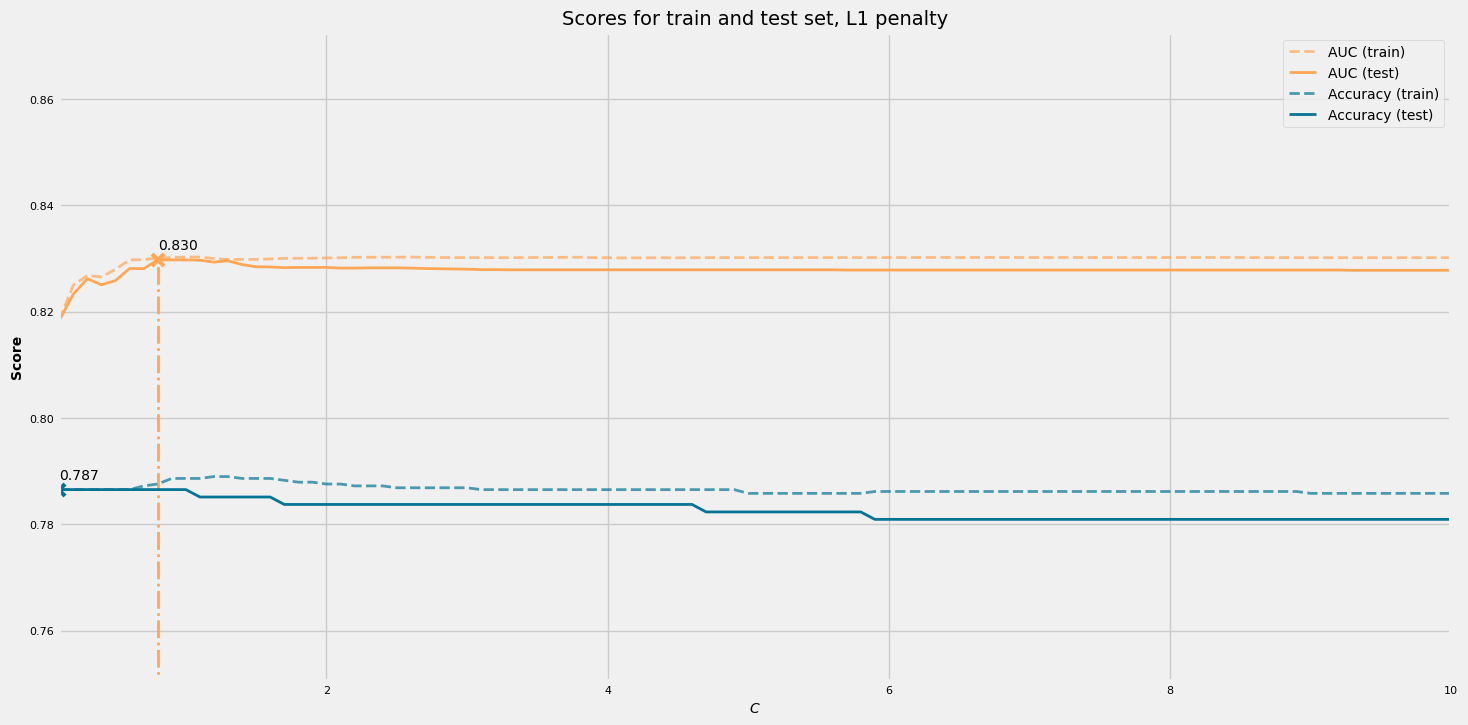

In [138]:
# Plot train and test scores for L1 penalty as a function of regularization parameter C

# Create the figure and axis using matplotlib object-oriented interface
fig, ax = plt.subplots(figsize=(16, 8))

# Filter results for L1 penalty only
dd = df_results[df_results.param_classifier__penalty == 'l1']
X_axis = np.array(dd['param_classifier__C'])

# Initialize min/max for y-axis limits
mn = float('inf')
mx = float('-inf')

# Loop over each scorer (AUC, Accuracy) and color
for scorer, color in zip(sorted(scoring), [colors[0], colors[1]]):
    # For both train and test scores, plot the mean score as a function of C
    for sample, style in (('train', '--'), ('test', '-')):
        mean = dd[f'mean_{sample}_{scorer}']
        std = dd[f'std_{sample}_{scorer}']
        # Plot mean score; use dashed line for train, solid for test
        ax.plot(
            X_axis, mean, style, color=color,
            alpha=1 if sample == 'test' else 0.7,
            label=f"{scorer} ({sample})"
        )
        # Update min/max for y-axis
        mn = min(mn, (mean - std).min())
        mx = max(mx, (mean + std).max())
    # Mark the best test score for this scorer
    scores = np.array(dd[f'mean_test_{scorer}'])
    best_index = scores.argmax()
    best_score = scores[best_index]
    ax.plot(
        [X_axis[best_index], ] * 2, [0, best_score],
        linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8
    )
    ax.annotate(f"{best_score:0.3f}", (X_axis[best_index], best_score + 0.002))

# Set axis labels and limits
ax.set_xlabel("$C$")
ax.set_ylabel("Score")
ax.set_xlim(0.1, 10)
ax.set_ylim(mn, mx)
ax.legend()
ax.set_title("Scores for train and test set, L1 penalty", fontsize=14)
plt.show()


In [139]:
# Define the range of regularization strengths (C parameter) to search over
domain = np.linspace(0.01, 1, 100)

# Define the parameter grid for GridSearchCV:
# - 'classifier__C': regularization strength (inverse of regularization)
# - 'classifier__penalty': type of regularization ('l1' or 'l2')
param_grid = [
    {
        'classifier__C': domain,
        'classifier__penalty': ['l1', 'l2']
    }
]

# 'scoring' is already defined in the notebook as:
# {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score, response_method='predict')}

# Build the pipeline:
# - Preprocessing (scaling, encoding)
# - Feature selection (SelectKBest with ANOVA F-test)
# - Logistic Regression classifier (solver='liblinear' supports both l1 and l2 penalties)
clf = Pipeline([
    ('preproc', preproc_pipeline),  # Standardize and encode features
    ('feature_selection', SelectKBest(score_func=f_classif, k=5)),  # Select top 5 features
    ('classifier', LogisticRegression(solver='liblinear'))  # Logistic Regression
])

# Set up GridSearchCV to search over the parameter grid using 5-fold cross-validation,
# optimizing for AUC, and returning training scores as well
clf = GridSearchCV(
    clf,
    param_grid,
    cv=5,
    scoring=scoring,
    refit='AUC',
    return_train_score=True,
    error_score='raise'
)

# Fit the GridSearchCV object to the training data
clf = clf.fit(X_train, y_train)

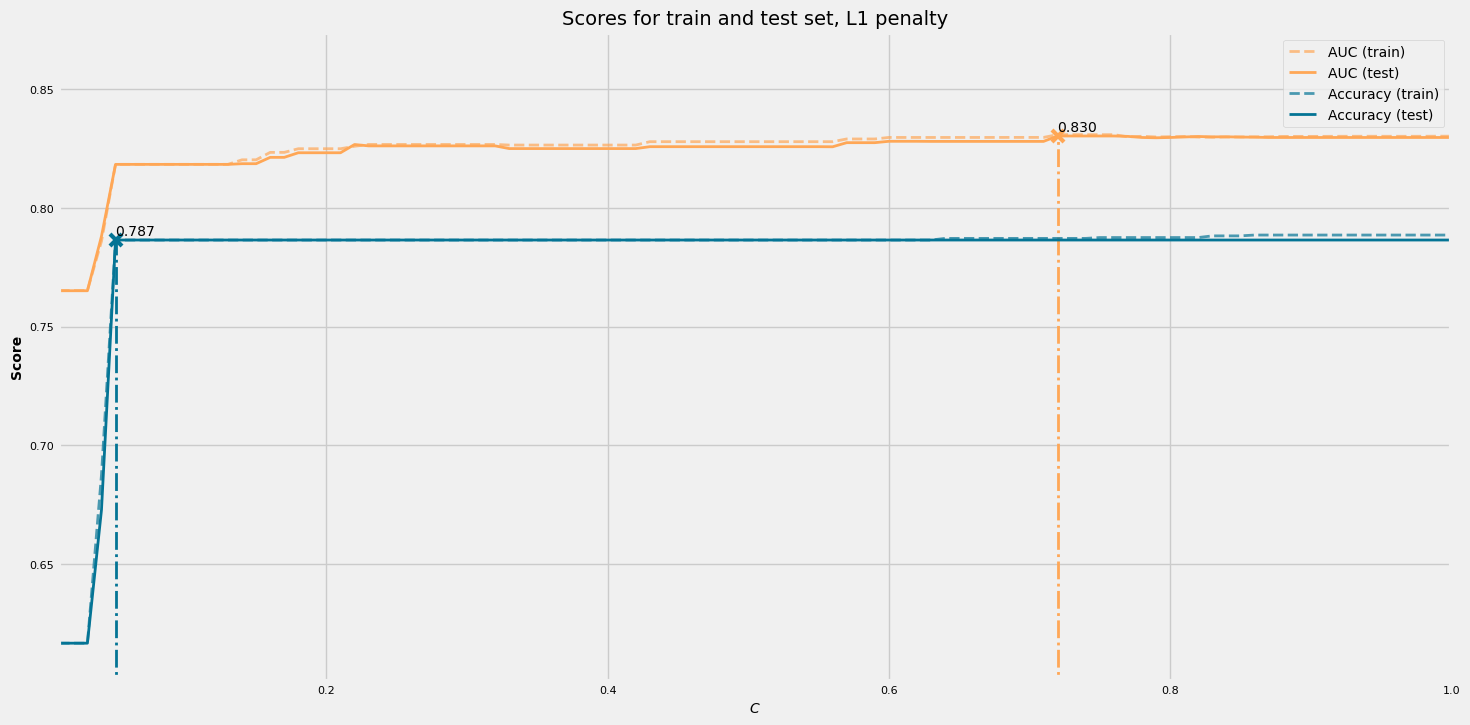

In [140]:
df_results = pd.DataFrame(clf.cv_results_)
# Filter results for L1 penalty only
dd = df_results[df_results.param_classifier__penalty == 'l1']
X_axis = np.array(dd['param_classifier__C'])

# Create the figure and axis using matplotlib object-oriented interface
fig, ax = plt.subplots(figsize=(16, 8))

# Initialize min/max for y-axis limits
mn = float('inf')
mx = float('-inf')

# Loop over each scorer (AUC, Accuracy) and color
for scorer, color in zip(sorted(scoring), [colors[0], colors[1]]):
    # Plot mean score for both train and test sets as a function of C
    for sample, style in (('train', '--'), ('test', '-')):
        mean = dd[f'mean_{sample}_{scorer}']
        std = dd[f'std_{sample}_{scorer}']
        ax.plot(
            X_axis, mean, style, color=color,
            alpha=1 if sample == 'test' else 0.7,
            label=f"{scorer} ({sample})"
        )
        # Update min/max for y-axis
        mn = min(mn, (mean - std).min())
        mx = max(mx, (mean + std).max())
    # Mark the best test score for this scorer
    scores = np.array(dd[f'mean_test_{scorer}'])
    best_index = scores.argmax()
    best_score = scores[best_index]
    ax.plot(
        [X_axis[best_index], ] * 2, [0, best_score],
        linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8
    )
    ax.annotate(f"{best_score:0.3f}", (X_axis[best_index], best_score + 0.002))

# Set axis labels and limits
ax.set_xlabel("$C$")
ax.set_ylabel("Score")
ax.set_xlim(0.01, 1)
ax.set_ylim(mn, mx)
ax.legend()
ax.set_title("Scores for train and test set, L1 penalty", fontsize=14)
plt.show()


In [141]:
# Define a narrow range for the regularization parameter C to search over
domain = np.linspace(0.65, 0.75, 100)

# Define the parameter grid for GridSearchCV:
# - 'classifier__C': regularization strength (inverse of regularization)
# - 'classifier__penalty': type of regularization ('l1' or 'l2')
param_grid = [{
    'classifier__C': domain,
    'classifier__penalty': ['l1', 'l2']
}]

# Use the scoring dictionary already defined in the notebook
# scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score, response_method='predict')}

# Build the pipeline:
# - Preprocessing (scaling, encoding)
# - Feature selection (SelectKBest with ANOVA F-test)
# - Logistic Regression classifier (solver='liblinear' supports both l1 and l2 penalties)
clf = Pipeline([
    ('preproc', preproc_pipeline),  # Standardize features
    ('feature_selection', SelectKBest(score_func=f_classif, k=5)),  
    ('classifier', LogisticRegression(solver='liblinear'))
])

# Set up GridSearchCV to search over the parameter grid using 5-fold cross-validation,
# optimizing for AUC, and returning training scores as well
clf = GridSearchCV(
    clf,
    param_grid,
    cv=5,
    scoring=scoring,
    refit='AUC',
    return_train_score=True,
    error_score='raise'
)

# Fit the GridSearchCV object to the training data
clf = clf.fit(X_train, y_train)

# Extract cross-validation results and convert to DataFrame for analysis
results = clf.cv_results_
df_results = pd.DataFrame(results)

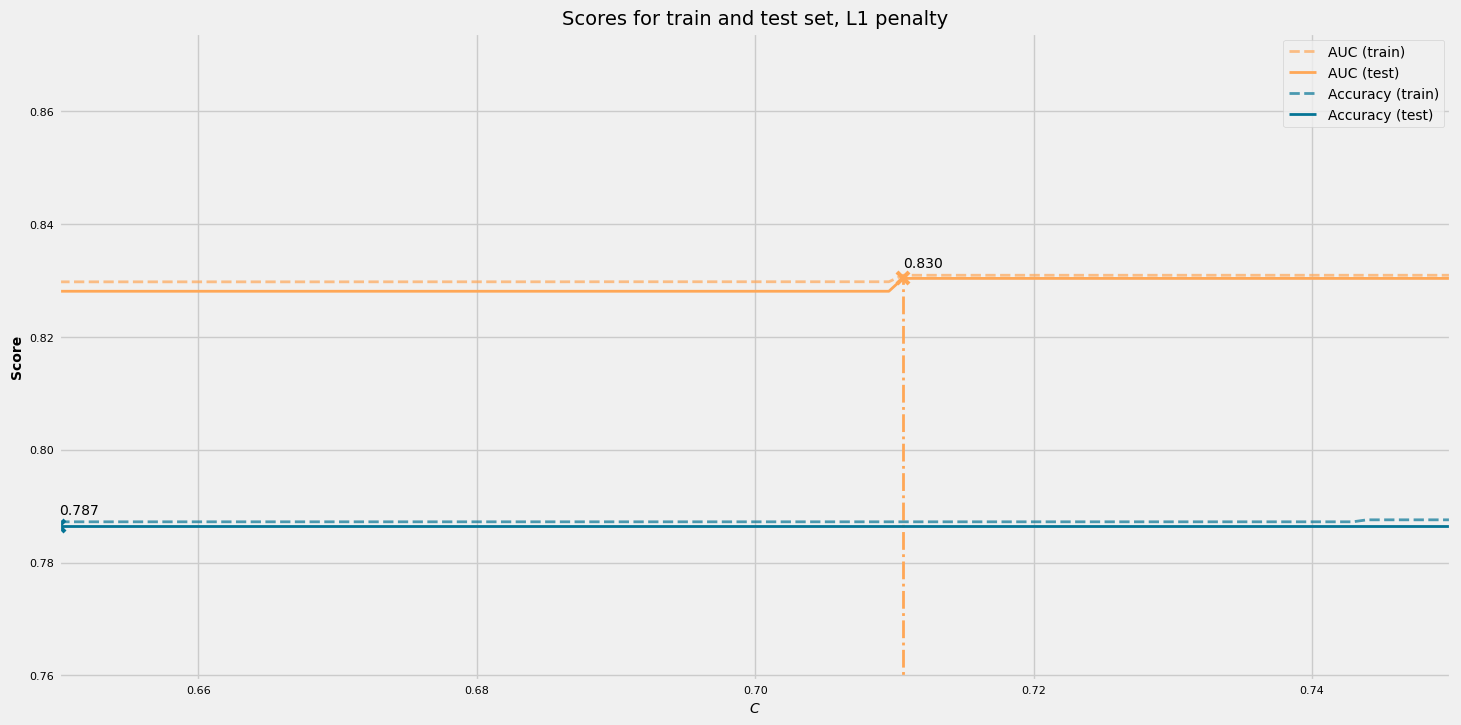

In [142]:
df_results = pd.DataFrame(clf.cv_results_)
# Filter results for L1 penalty only
dd = df_results[df_results.param_classifier__penalty == 'l1']
X_axis = np.array(dd['param_classifier__C'])

# Create the figure and axis using matplotlib object-oriented interface
fig, ax = plt.subplots(figsize=(16, 8))

# Initialize min/max for y-axis limits
mn = float('inf')
mx = float('-inf')

# Plot mean train and test scores for each scorer as a function of C
for scorer, color in zip(sorted(scoring), [colors[0], colors[1]]):
    for sample, style in (('train', '--'), ('test', '-')):
        mean = dd[f'mean_{sample}_{scorer}']
        std = dd[f'std_{sample}_{scorer}']
        # Plot mean score; dashed for train, solid for test
        ax.plot(
            X_axis, mean, style, color=color,
            alpha=1 if sample == 'test' else 0.7,
            label=f"{scorer} ({sample})"
        )
        # Update min/max for y-axis
        mn = min(mn, (mean - std).min())
        mx = max(mx, (mean + std).max())
    # Mark the best test score for this scorer
    scores = np.array(dd[f'mean_test_{scorer}'])
    best_index = scores.argmax()
    best_score = scores[best_index]
    ax.plot(
        [X_axis[best_index], ] * 2, [0, best_score],
        linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8
    )
    ax.annotate(f"{best_score:0.3f}", (X_axis[best_index], best_score + 0.002))

# Set axis labels, limits, legend, and title
ax.set_xlabel("$C$")
ax.set_ylabel("Score")
ax.set_xlim(0.65, 0.75)
ax.set_ylim(mn, mx)
ax.legend()
ax.set_title("Scores for train and test set, L1 penalty", fontsize=14)
plt.show()